In [ ]:
#Code to Import Libraries and Connection to Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Dataset/'#2019-02-west-yorkshire-stop-and-search.csv

Mounted at /content/drive


In [ ]:
#Import OS and Glob Library to Load All the CSV Files Starting with name "data_"
import os,glob
all_files = glob.glob(os.path.join(path, "data_*.csv"))

In [ ]:
#Merger Code where we Merged all the files i.e. 12 Months x 3 Years = 36 files into merged.csv 
df_form_each = (pd.read_csv(f,sep=',')for f in all_files)
df_merged = pd.concat(df_form_each, ignore_index = True)
df_merged.count
# df_merged.to_csv("merged.csv") #Donot RUN this Line As it is already been done once to Save file

In [ ]:
#Read and Load All the Merged Data from 2019 to 2021
df_all_data = pd.read_csv(path+'Data_2019-2021.csv')
# df_all_data.count

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Show the data Head Rows
df_all_data.head()

,Source.Name,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,2019-01-west-yorkshire-stop-and-search.csv,Person search,1/1/19 00:05,False,NaN,53.691898,-1.311197,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
1,2019-01-west-yorkshire-stop-and-search.csv,Person search,1/1/19 00:25,False,NaN,53.692619,-1.309943,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
2,2019-01-west-yorkshire-stop-and-search.csv,Person search,1/1/19 00:25,False,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False
3,2019-01-west-yorkshire-stop-and-search.csv,Person search,1/1/19 00:50,False,NaN,53.794478,-1.757105,Male,25-34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
4,2019-01-west-yorkshire-stop-and-search.csv,Person search,1/1/19 02:00,False,NaN,53.689459,-1.805242,Male,Oct-17,Mixed/Multiple ethnic groups - White and Black...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,False


In [ ]:
#Print the Number of Null Values in each Column
print(df_all_data.isnull().sum())

Source.Name                                     0
Type                                            0
Date                                            0
Part of a policing operation                 1458
Policing operation                          50503
Latitude                                     3759
Longitude                                    3759
Gender                                       3451
Age range                                    3115
Self-defined ethnicity                         92
Officer-defined ethnicity                    2365
Legislation                                   759
Object of search                             2404
Outcome                                      8070
Outcome linked to object of search           8070
Removal of more than just outer clothing        0
dtype: int64


In [ ]:
#Print All Data Types and their Non-Null Values
print(df_all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Source.Name                               50503 non-null  object 
 1   Type                                      50503 non-null  object 
 2   Date                                      50503 non-null  object 
 3   Part of a policing operation              49045 non-null  object 
 4   Policing operation                        0 non-null      float64
 5   Latitude                                  46744 non-null  float64
 6   Longitude                                 46744 non-null  float64
 7   Gender                                    47052 non-null  object 
 8   Age range                                 47388 non-null  object 
 9   Self-defined ethnicity                    50411 non-null  object 
 10  Officer-defined ethnicity         

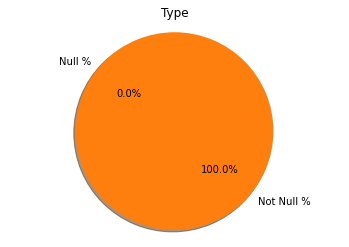

<Figure size 432x432 with 0 Axes>

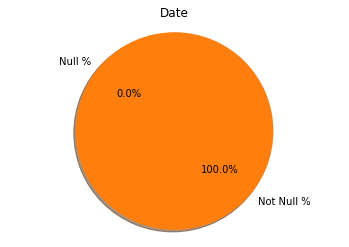

<Figure size 432x432 with 0 Axes>

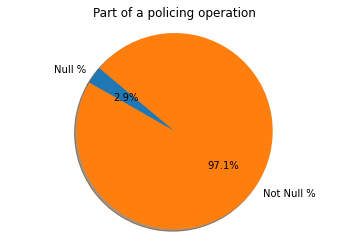

<Figure size 432x432 with 0 Axes>

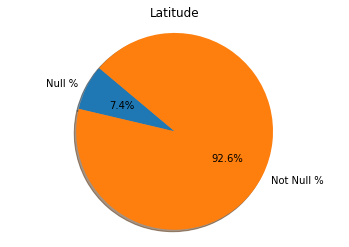

<Figure size 432x432 with 0 Axes>

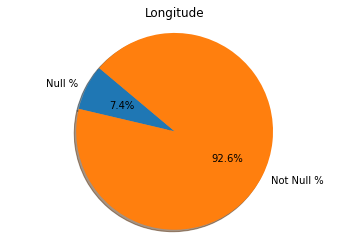

<Figure size 432x432 with 0 Axes>

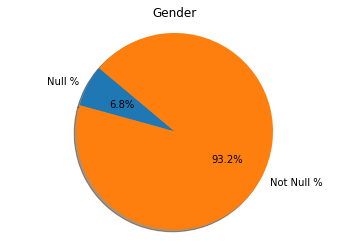

<Figure size 432x432 with 0 Axes>

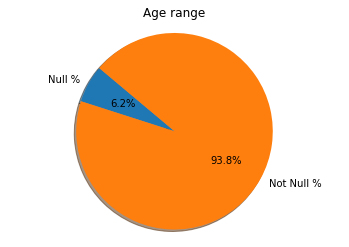

<Figure size 432x432 with 0 Axes>

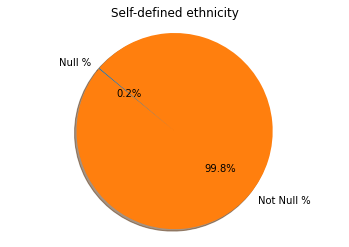

<Figure size 432x432 with 0 Axes>

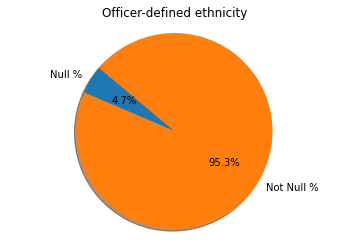

<Figure size 432x432 with 0 Axes>

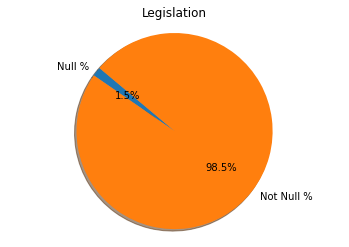

<Figure size 432x432 with 0 Axes>

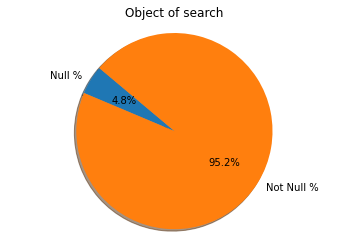

<Figure size 432x432 with 0 Axes>

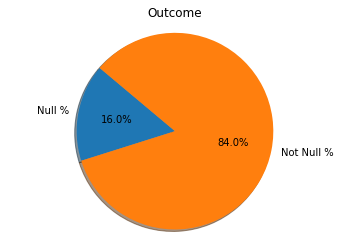

<Figure size 432x432 with 0 Axes>

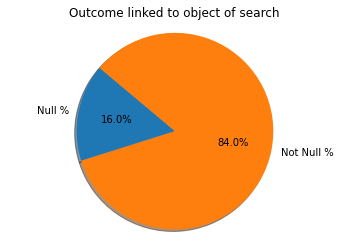

<Figure size 432x432 with 0 Axes>

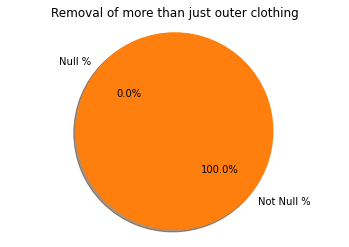

<Figure size 432x432 with 0 Axes>

In [ ]:
#Plotting the Null VS Non Null Values of Each Column in Pie Chart
import matplotlib.pyplot as plt2
labels = ['Null %', 'Not Null %']
listName = df_all_data.columns.values.tolist()

for colName in listName:
  if colName != 'Policing operation' and colName != 'Source.Name':
    sizes = [(df_all_data[colName].isnull().sum()/df_all_data[colName].count().sum())*100,(df_all_data[colName].notnull().sum()/df_all_data[colName].count().sum())*100 ]
    # Plot
    plt2.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt2.axis('equal')
    plt2.title(colName)
    plt2.figure(figsize=(6,6))
    plt2.show()
print()

# df_all_data['Type'].isnull().sum()#Null values
# df_all_data['Type'].notnull().sum()
# df_all_data['Type'].count().sum()

# for (columnName) in df_all_data.iteritems():
#   print(columnName)



# for columnName in df_all_data:
#   print(df_all_data[columnName])

# print()

In [ ]:
# import matplotlib.pyplot as plt
# labels = ['Null %', 'Not Null %']
# # print((pd.to_datetime(df_all_data['Date']).dt.year.isin(['2019'])))
# print(df_all_data['Date'].describe())
# df_all_data_19 =  df_all_data[pd.to_datetime(df_all_data['Date'], dayfirst=True).dt.year.isin['2019']]
# listName = df_all_data.columns.values.tolist()
# for colName in listName:
#   if colName != 'Policing operation' and colName != 'Source.Name':
#     sizes = [(df_all_data[colName].isnull().sum()/df_all_data[colName].count().sum())*100,(df_all_data[colName].notnull().sum()/df_all_data[colName].count().sum())*100 ]
#     # Plot
#     plt.pie(sizes, labels=labels, 
#         autopct='%1.1f%%', shadow=True, startangle=140)
#     plt.axis('equal')
#     plt.title(colName)
#     plt.show()

# print(pd.to_datetime(df_all_data['Date'], dayfirst=True).dt.year)

In [ ]:
#Drop the Source.Name column Created while Merging the Data, Dropped the Null Column Policing operation
df_all_data_V2 = df_all_data.drop(columns = ['Source.Name','Policing operation'])
#Show info Data
df_all_data_V2.info()
#Drop Null Rows where outcome variable is null
df_all_data_V2 = df_all_data_V2.dropna(axis=0, subset=['Outcome'])

In [ ]:
#Dropping Null Rows from Outcome Variable
df_all_data_V2 = df_all_data_V2.dropna(axis=0, subset=['Outcome'])
df_all_data_V2.info()

In [ ]:
#Plotting Histogram with Real Values as in Data
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

hist = df_all_data_V2['Gender'].hist(bins=2)

#df_all_data_V2['Latitude'].hist(bins=2)
#df_all_data_V2['Longitude'].hist(bins=df_all_data_V2['Longitude'].nunique())

df_all_data_V2['Object of search'].hist(bins=df_all_data_V2['Object of search'].nunique())

df_all_data_V2['Officer-defined ethnicity'].hist(bins=df_all_data_V2['Officer-defined ethnicity'].nunique())
df_all_data_V2['Self-defined ethnicity'].hist(bins=df_all_data_V2['Self-defined ethnicity'].nunique())
df_all_data_V2['Outcome'].hist(bins=df_all_data_V2['Outcome'].nunique())

In [ ]:
# #Code for converting coordinates to cities and plotting the coordinates on a map

!pip install geopandas #This Line is for Installing GeoPandas 

#Import all required modules

import plotly.express as px
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm.notebook import tqdm



# #create a coordinates column by concatinating latitude aned logitude together

# df_all_data_V2['coordinates'] = df_all_data_V2['Latitude'].map(str) + ',' + df_all_data_V2['Longitude'].map(str)
# #Create a fucntion for reverse geocoding that handles errors as well since there are missing values, null in out dataset
# from math import nan
# geolocator = Nominatim(user_agent='http')
# def reverse_geocode(coordinates):
#   try:
#     return geolocator.reverse(coordinates).raw.get('address').get('city')
#   except:
#     return nan

# #Code to finally create cities
# df_all_data_V2['city'] = df_all_data_V2['coordinates'].apply(lambda coord: reverse_geocode(coord))
# df_all_data_V2.to_csv('/content/drive/MyDrive/Dataset/data_new_city.csv')
# df_all_data_V2.head()


# #Code to create points on a map

fig = px.scatter_mapbox(df_all_data, lat='Latitude', lon='Longitude', zoom=15)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



# df_all_data_V2.head()

In [ ]:
#Arrest
#A no further action disposal
#ELSE#
#Arrest
#Converting the Outcome Variable to 3 Class from 7 Class 
df_all_data_V2['Outcome'] = df_all_data_V2['Outcome'].replace('Arrest','Detained')
df_all_data_V2['Outcome'] =  df_all_data_V2['Outcome'].replace('A no further action disposal','Nothing Suspicious')
df_all_data_V2['Outcome'] =  df_all_data_V2['Outcome'].replace('Penalty Notice for Disorder','Warning')
df_all_data_V2['Outcome'] =  df_all_data_V2['Outcome'].replace('Caution (simple or conditional)','Warning')
df_all_data_V2['Outcome'] =  df_all_data_V2['Outcome'].replace('Community resolution','Warning')
df_all_data_V2['Outcome'] =  df_all_data_V2['Outcome'].replace('Summons / charged by post','Warning')
df_all_data_V2['Outcome'] =  df_all_data_V2['Outcome'].replace('Khat or Cannabis warning','Warning')
print(df_all_data_V2['Outcome'].unique())
#Exporting the New Updated Data
df_all_data_V2.to_csv('/content/drive/MyDrive/Dataset/data_new.csv')
# df_all_data_V2.to_csv("c:/abc",sep=',',header=True)


['Nothing Suspicious' 'Warning' 'Detained']


In [ ]:
#Loading of new Updated Data
df_cleaned = pd.read_csv(path+'data_new.csv')

In [ ]:
#Cleaned Data Set Information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42433 entries, 0 to 42432
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                42433 non-null  int64  
 1   Type                                      42433 non-null  object 
 2   Date                                      42433 non-null  object 
 3   Part of a policing operation              41313 non-null  object 
 4   Latitude                                  39194 non-null  float64
 5   Longitude                                 39194 non-null  float64
 6   Gender                                    39662 non-null  object 
 7   Age range                                 39947 non-null  object 
 8   Self-defined ethnicity                    42405 non-null  object 
 9   Officer-defined ethnicity                 40530 non-null  object 
 10  Legislation                       

In [ ]:
#Code for converting coordinates to cities and plotting the coordinates on a map

# !pip install geopandas #This Line is for Installing GeoPandas 

#Import all required modules

import plotly.express as px
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm.notebook import tqdm



#create a coordinates column by concatinating latitude aned logitude together

df_cleaned['coordinates'] = df_cleaned['Latitude'].map(str) + ',' + df_cleaned['Longitude'].map(str)
#Create a fucntion for reverse geocoding that handles errors as well since there are missing values, null in out dataset
from math import nan
geolocator = Nominatim(user_agent='http')
def reverse_geocode(coordinates):
  try:
    return geolocator.reverse(coordinates).raw.get('address').get('city')
  except:
    return nan

#Code to finally create cities
df_cleaned['city'] = df_cleaned['coordinates'].apply(lambda coord: reverse_geocode(coord))
# df_cleaned.to_csv('/content/drive/MyDrive/Dataset/data_new_V3.csv')#Donot RUN this Line As it is already been done once to Save file
df_cleaned.head()


# Code to create points on a map

fig = px.scatter_mapbox(df_cleaned, lat='Latitude', lon='Longitude', zoom=15)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
#Loading of new Updated Data with City Column
df_V3 = pd.read_csv(path+'data_new_V3.1.csv')
df_V3.head()

Loading County Wise Data Removing the outliers

In [ ]:

df_V3.head()
#Unique Cities Data to a CSV file
#df_cities.to_csv('/content/drive/MyDrive/Dataset/unique_cities.csv')
#West Yorkshire Cities = Wakefield,Bradford,Calderdale,Kirklees,Leeds,Ely,Doncaster,Craven (7 Out of 41)
#Total Rows After Previous cleaning = 42,433 (includin the Null Values)
#After Removing the Outliers it will be 42,367 Records
#Removing the Outliers from cities
#Loading only thoss cities wiht County West Yorkshire
df_V4 = df_V3.loc[(df_V3['County'] == 'West Yorkshire')|(df_V3['County'].isna()== True)]
df_V4.info()

#df_v4['city'].count()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 42367 entries, 0 to 42432
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                42367 non-null  int64  
 1   Type                                      42367 non-null  object 
 2   Date                                      42367 non-null  object 
 3   Part of a policing operation              41249 non-null  object 
 4   Latitude                                  39128 non-null  float64
 5   Longitude                                 39128 non-null  float64
 6   Gender                                    39603 non-null  object 
 7   Age range                                 39887 non-null  object 
 8   Self-defined ethnicity                    42339 non-null  object 
 9   Officer-defined ethnicity                 40468 non-null  object 
 10  Legislation                       

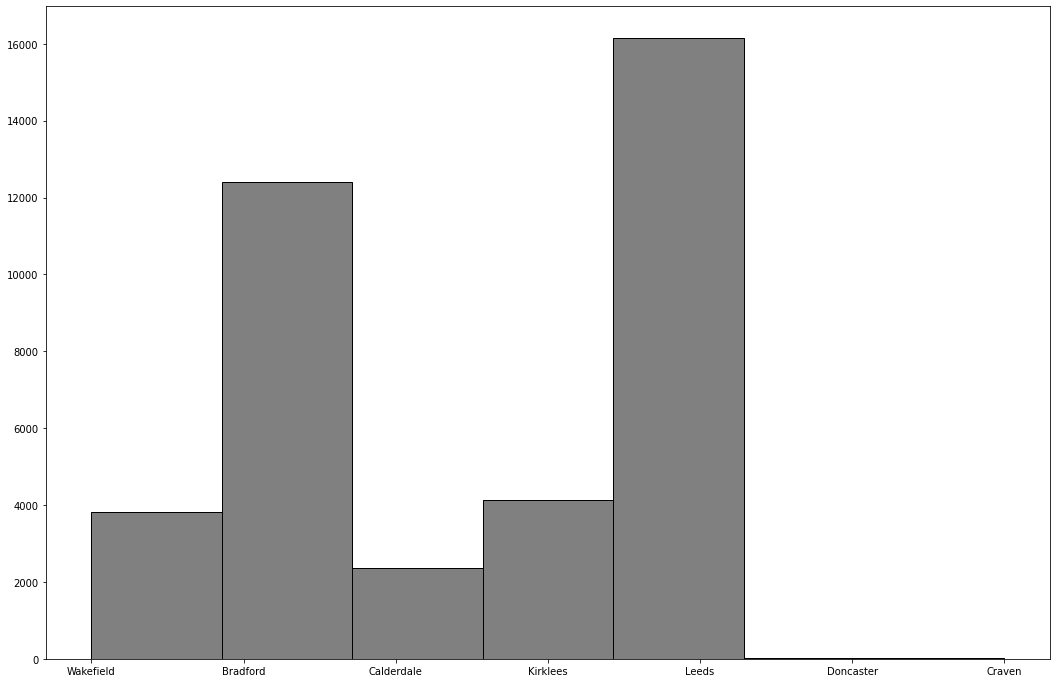

In [ ]:
#Histogram of the Cities
df_V4['city'].hist(bins=df_V4['city'].nunique(),figsize=(18,12), grid = False, color='grey', ec = 'black')

In [ ]:
#import of basic plotting tools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Function to convert Non-Numberic Data into Numeric Data
def handle_non_numerical_data (df) : 
  columns = df.columns.values
  for column in columns: 
    text_digit_vals  = {}
    def convert_to_int (val):
      return text_digit_vals [val]

    if df[column].dtype != np.int64 and df[column].dtype != np.float64: 
      column_contents = df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals [unique] = x
          x+=1
      df[column] = list(map(convert_to_int, df[column]))
  return df
# handle_non_numerical_data(df_cleaned)
dataBin = handle_non_numerical_data(df_V4)
dataBin.head()
params = {'axes.titlesize':'32'}
plt.rcParams.update(params)
dataBin = dataBin[['Age range','Type'
,'Part of a policing operation',
'Gender','Self-defined ethnicity','Officer-defined ethnicity','Legislation',
'Object of search','Outcome','Outcome linked to object of search','Removal of more than just outer clothing','city','County']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Storing Numerical Data to a CSV file numerical values
# dataBin.to_csv('/content/drive/MyDrive/Dataset/data_numericalV4.csv')#Donot RUN this Line As it is already been done once to Save file

In [ ]:
df_V41.head()

NameError: ignored

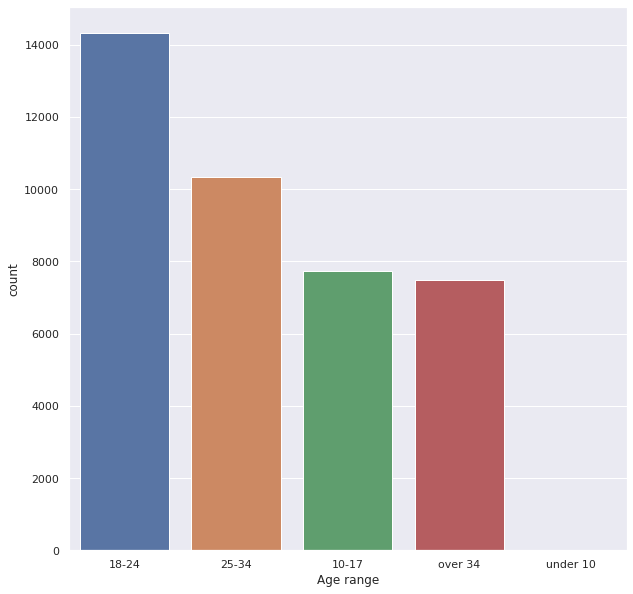

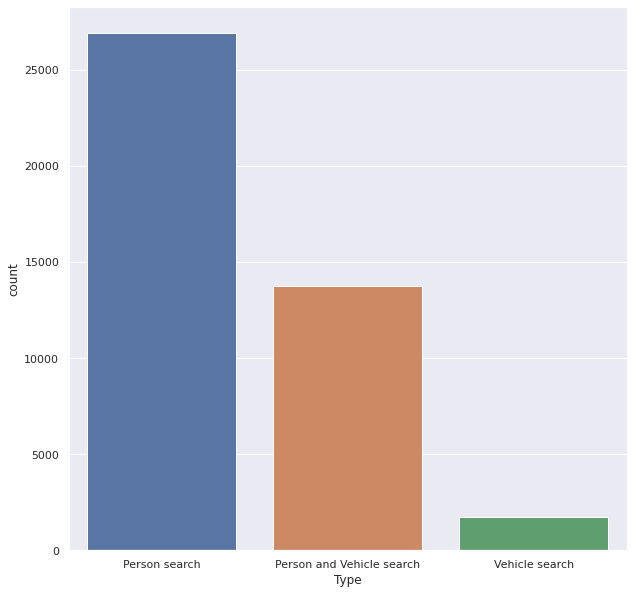

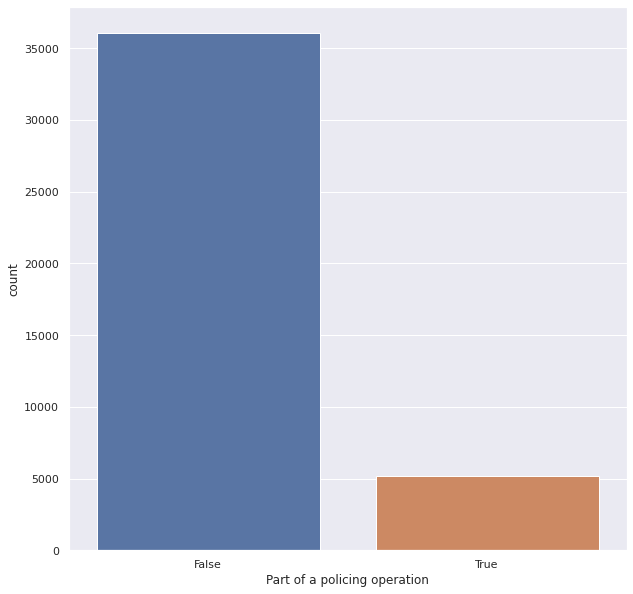

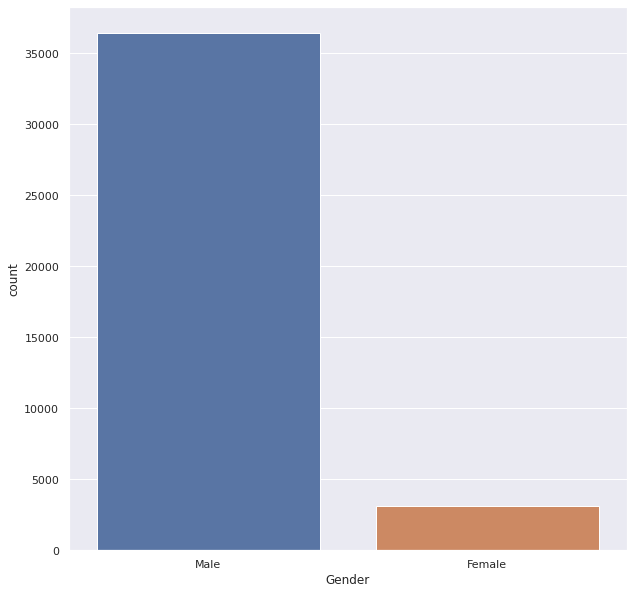

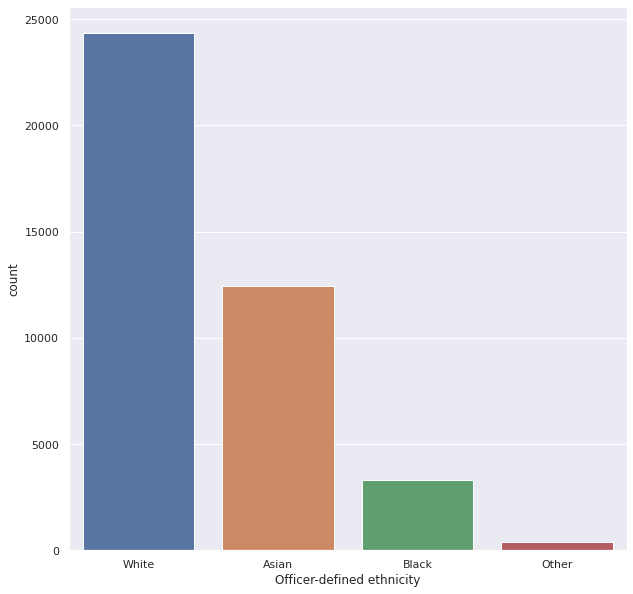

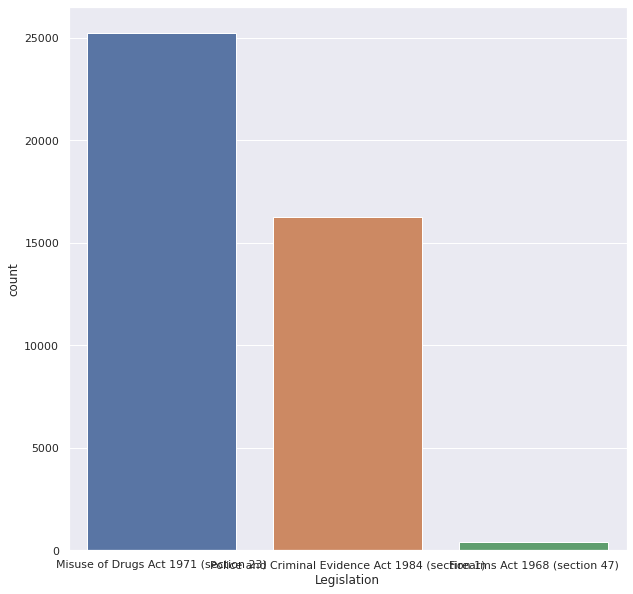

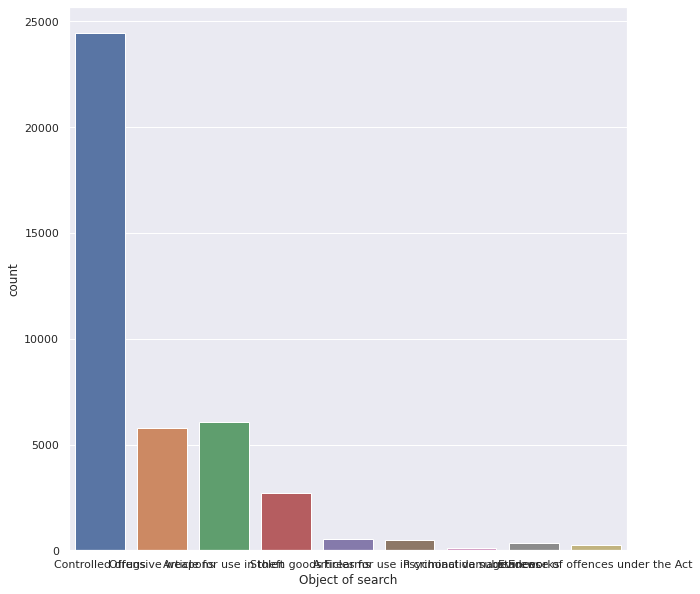

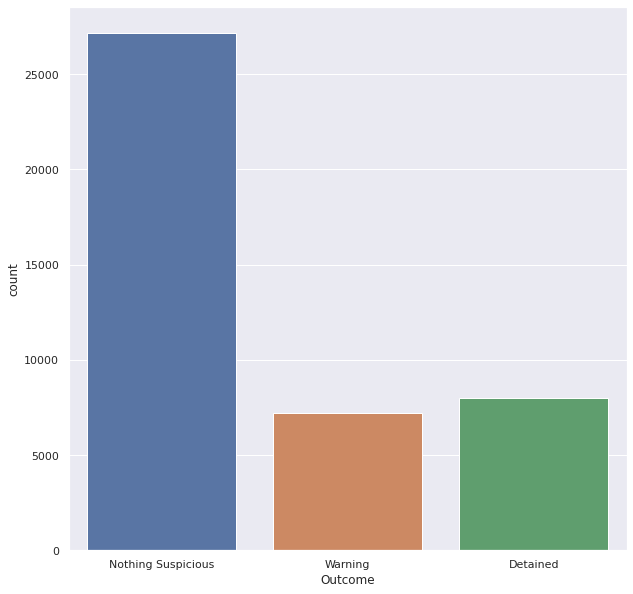

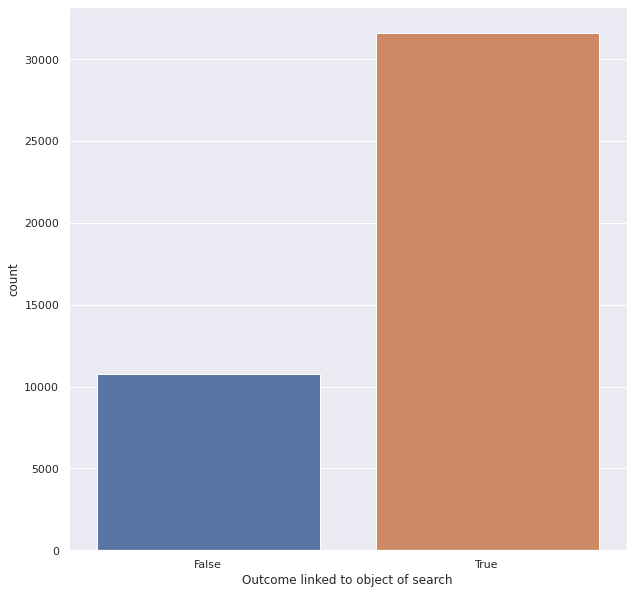

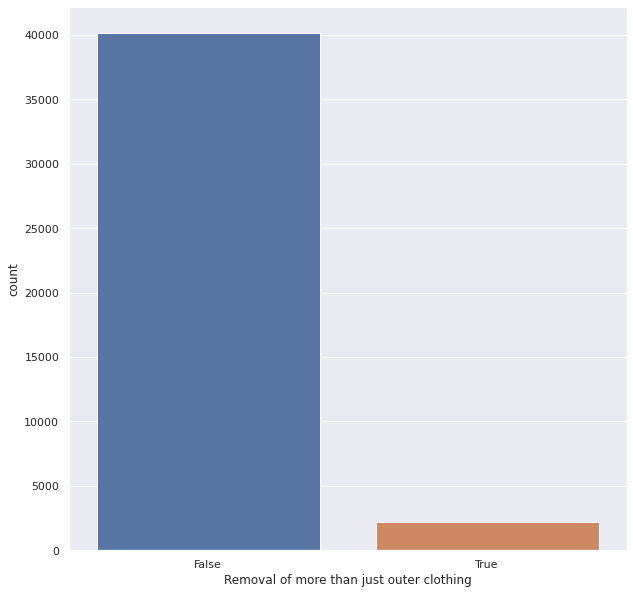

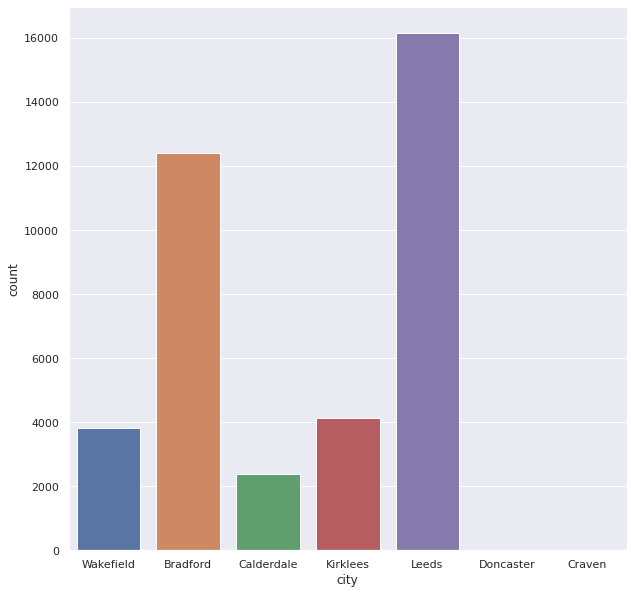

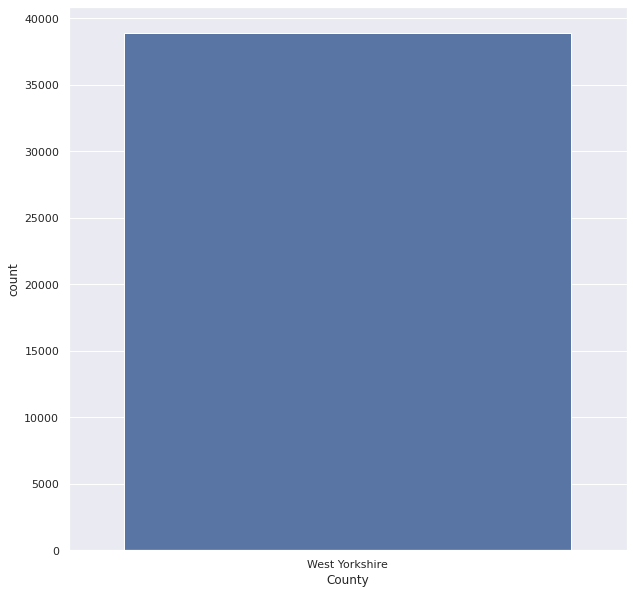

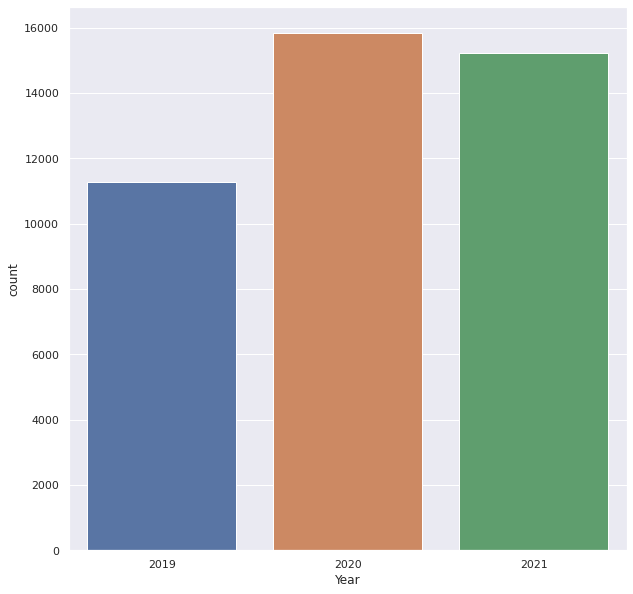

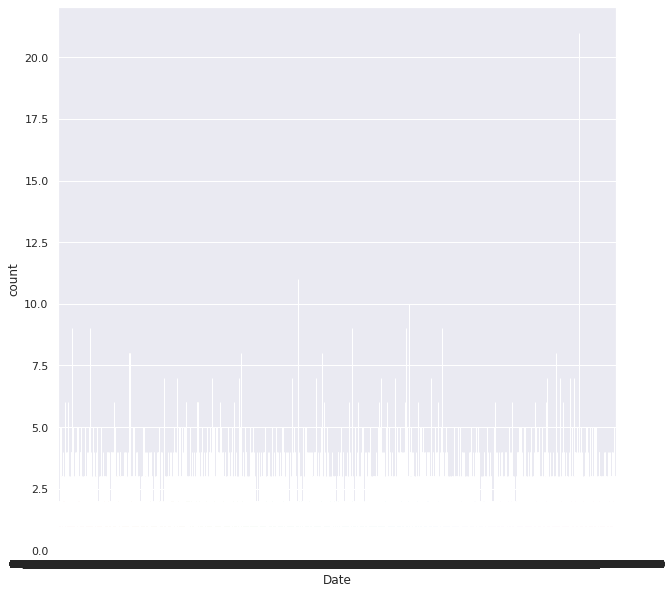

In [ ]:
for i,col in enumerate(df_V41):
    plt.figure(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.countplot(x=col, data=df_V41)

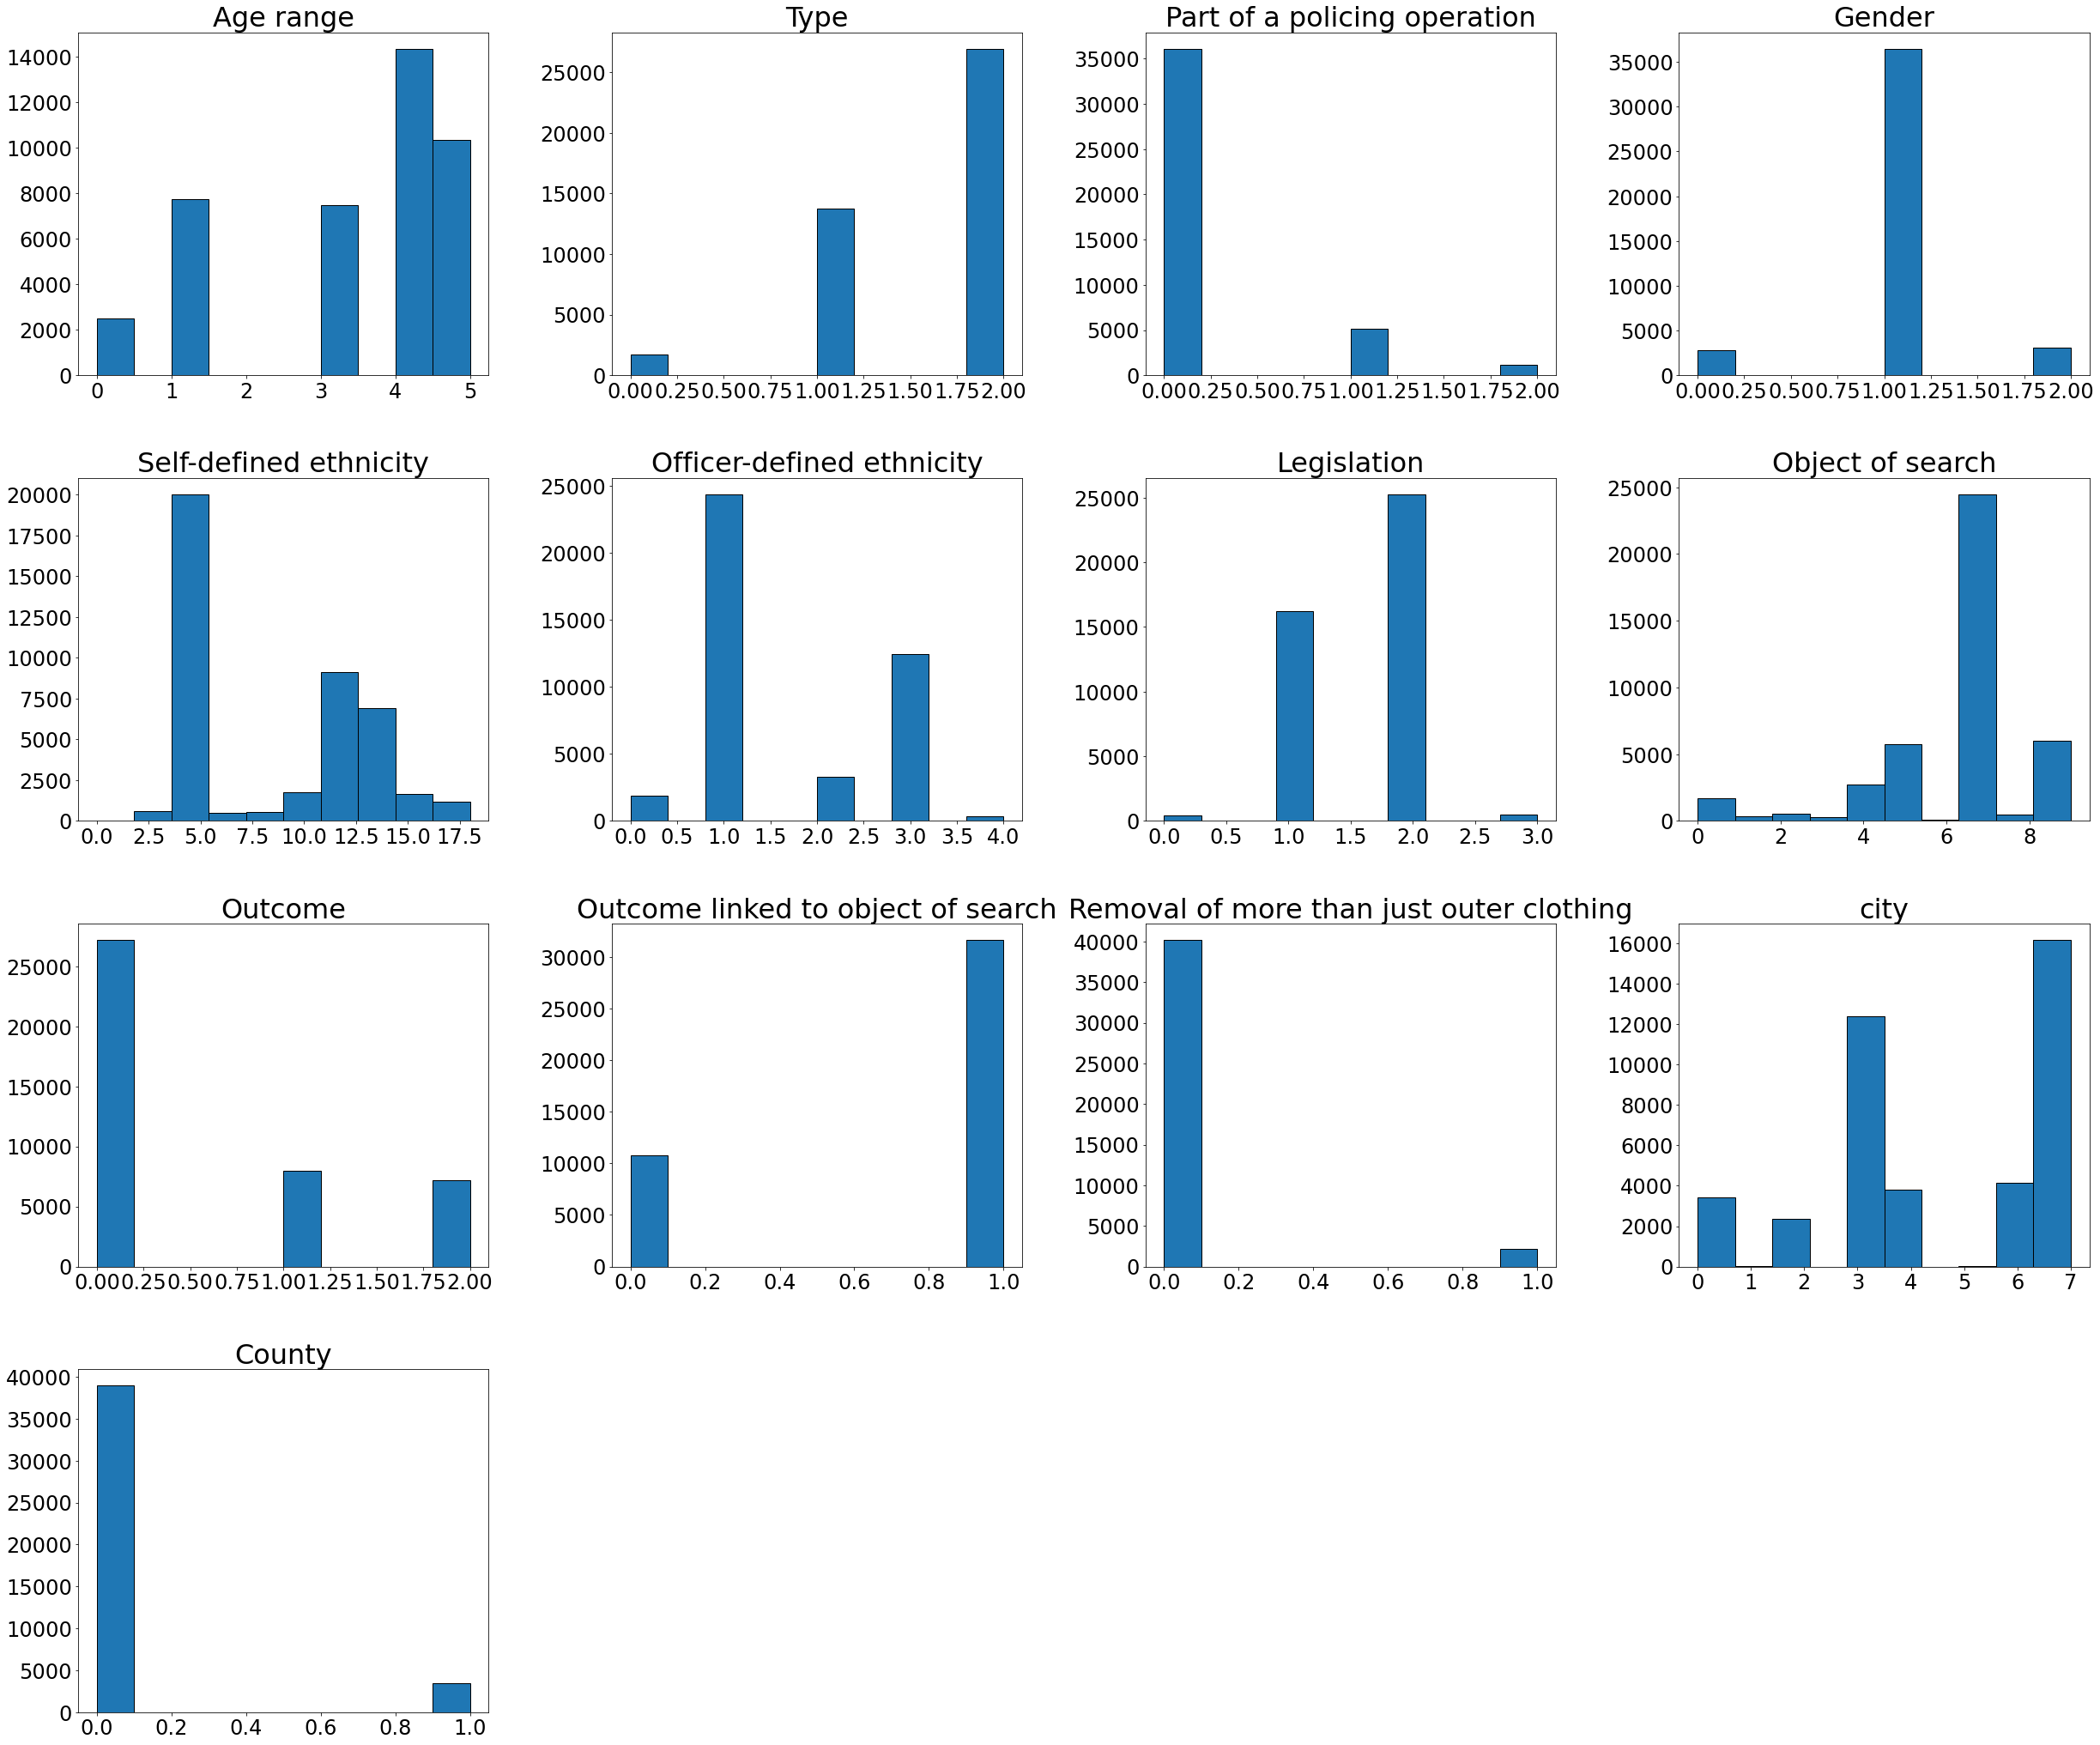

In [ ]:
#Loading Numeric Data from Drive and Plotting Histogram for the data
df_N = pd.read_csv(path+'data_numericalV4.csv')
params = {'axes.titlesize':'32'}
df_N.hist(figsize = (42,36), xlabelsize = 24, ylabelsize = 24, grid = False, ec="k")
plt.rcParams.update(params)
plt.show()


In [ ]:
# #Histogram of Date Data in Years and Months
# #Loading Numeric Data from Drive and Plotting Histogram for the data
# df_Date = pd.read_csv(path+'data_numericalV1.2.csv')
# df_Date = df_V4['Date']
# df_Date = pd.to_datetime(df_Date).dt.strftime('%m/%Y')
# df_Date.hist(figsize=(28,28),xlabelsize=18,ylabelsize=32,legend=True,grid=False,bins=10)
# plt.plot()

[]

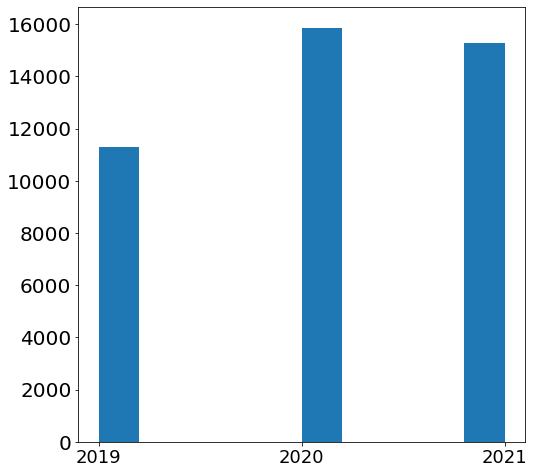

In [ ]:
#No of Values in each year, means Yearly stop and Search Data
df_Year = pd.read_csv(path+'data_numericalV1.2.csv')
df_Year = df_Year['Date']
df_Year = pd.to_datetime(df_Year).dt.strftime('%Y')
ax = df_Year.hist(figsize=(8,8),xlabelsize=18,ylabelsize=20,legend=False,grid=False)
# for p in ax.patches:
#         ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))
plt.plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42433 entries, 0 to 42432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  42433 non-null  int64
 1   Year    42433 non-null  int64
dtypes: int64(2)
memory usage: 663.1 KB


Text(0.5, 1.0, 'No of Crime with respect to Gender per Year')

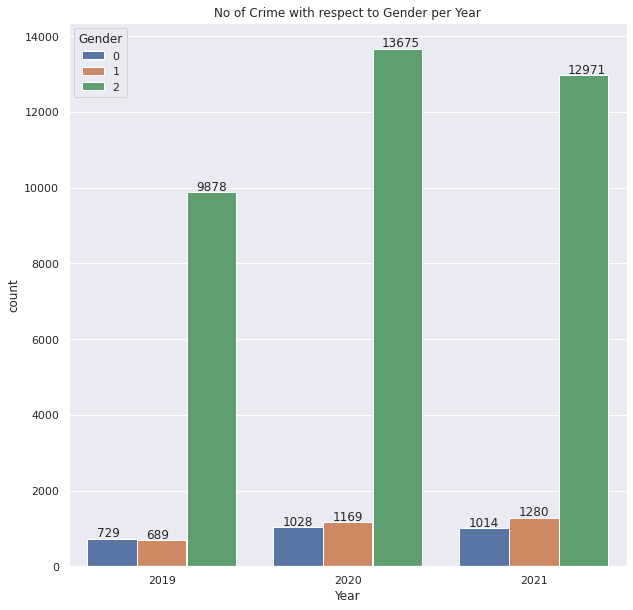

In [ ]:
#Connected Yearly and Gender Values to show the stop and search based on Gender, i.e. How many stops were conducted against each gender w.r.t Year
df_YG = pd.read_csv(path+'df_YG.csv')
df_YG.info()
ax = sns.countplot(x='Year',hue='Gender',data=df_YG)
for p in ax.patches:
        ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))
sns.set(rc={'figure.figsize':(10,10)})
plt.title("No of Crime with respect to Gender per Year")

Selecting V4.1 that includes specific columns with West Yorkshire Entity

In [ ]:
df_Date2 = df_V4['Date']
df_Date2 = pd.to_datetime(df_Date2).dt.strftime('%Y')
df_Date2 = df_Date2.rename('Year')
df_Date2.tail()
df_Date2 = df_Date2.to_frame()
df_V4 = df_V4.join(df_Date2)
display(df_V4)
df_V41 = df_V4[['Age range','Type'
,'Part of a policing operation',
'Gender','Self-defined ethnicity','Officer-defined ethnicity','Legislation',
'Object of search','Outcome','Outcome linked to object of search','Removal of more than just outer clothing','city','County','Year','Date']]

#This first line will replace Oct-17 i.e. 10 to 17 to 10-17 because it is reading it as 
#Oct-17 in MS Excel
df_V41['Age range'] = df_V41['Age range'].replace(['Oct-17'],'10-17')

,Unnamed: 0,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,coordinates,city,County,Year
0,0,Person search,01/01/2019 00:05,False,53.691898,-1.311197,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,True,False,"53.691898,-1.311197",Wakefield,West Yorkshire,2019
1,1,Person search,01/01/2019 00:25,False,53.692619,-1.309943,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,True,False,"53.692619,-1.309943",Wakefield,West Yorkshire,2019
2,2,Person search,01/01/2019 00:25,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Warning,True,False,"nan,nan",NaN,NaN,2019
3,3,Person search,01/01/2019 00:50,False,53.794478,-1.757105,Male,25-34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,True,False,"53.794478,-1.757105",Bradford,West Yorkshire,2019
4,4,Person search,01/01/2019 02:00,False,53.689459,-1.805242,Male,Oct-17,Mixed/Multiple ethnic groups - White and Black...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Nothing Suspicious,True,False,"53.689459,-1.805242",Calderdale,West Yorkshire,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42428,42428,Person search,31/12/2021 22:50,False,53.799265,-1.738601,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Nothing Suspicious,True,False,"53.799265,-1.738601",Bradford,West Yorkshire,2021
42429,42429,Person search,31/12/2021 23:00,False,53.565370,-1.780643,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Warning,False,False,"53.56537,-1.780643",Kirklees,West Yorkshire,2021
42430,42430,Person search,31/12/2021 23:18,False,53.796001,-1.542845,Male,over 34,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,True,False,"53.796001,-1.542845",Leeds,West Yorkshire,2021
42431,42431,Person and Vehicle search,31/12/2021 23:40,False,53.713144,-2.097749,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Detained,False,False,"53.713144,-2.097749",Calderdale,West Yorkshire,2021


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
#Storing Version 4.1 as CSV for later Use
# df_V41.to_csv('/content/drive/MyDrive/Dataset/dataV4.1.csv')#Donot RUN this Line As it is already been done once to Save file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Outcome with respect to Gender')

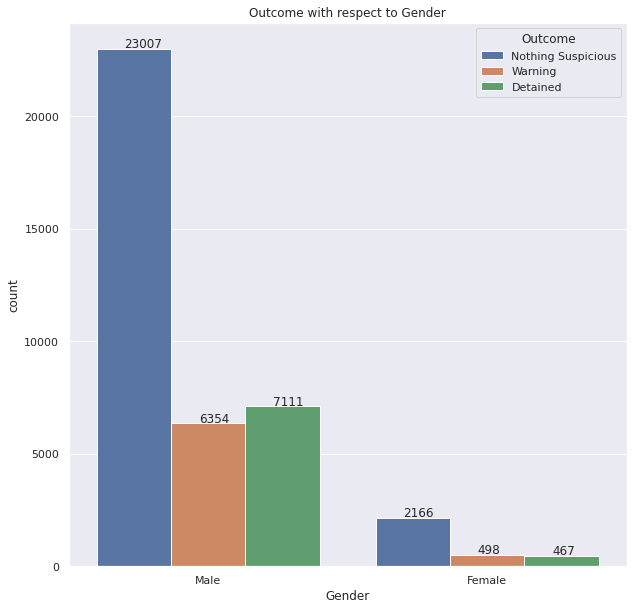

In [ ]:
#load the dataV4.1.csv
df_V41 = pd.read_csv(path+'dataV4.1.csv')
df_V41 = df_V41.drop(['Unnamed: 0', 'Self-defined ethnicity'], axis= 1)
#Outcome with Respect to gender
ax = sns.countplot(x='Gender',hue='Outcome',data=df_V41)
sns.set(rc={'figure.figsize':(10,10)})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.title("Outcome with respect to Gender")

(Stacked Plots)
Outcome with respect to city

Outcome with respect to type of search

Outcome with respect to officer defined ethnicity

Outcome with respect to age range

Outcome with respect to gender

In [ ]:
#Stacked Plot Basis
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
# df_V41['Outcome'].unique()
# df_V3['County'].unique()#.info()
# y-axis in bold
rc('font', weight='bold')
df_NS = df_V41[df_V41['Outcome']=='Nothing Suspicious']
df_W = df_V41[df_V41['Outcome']=='Warning']
df_D = df_V41[df_V41['Outcome']=='Detained']

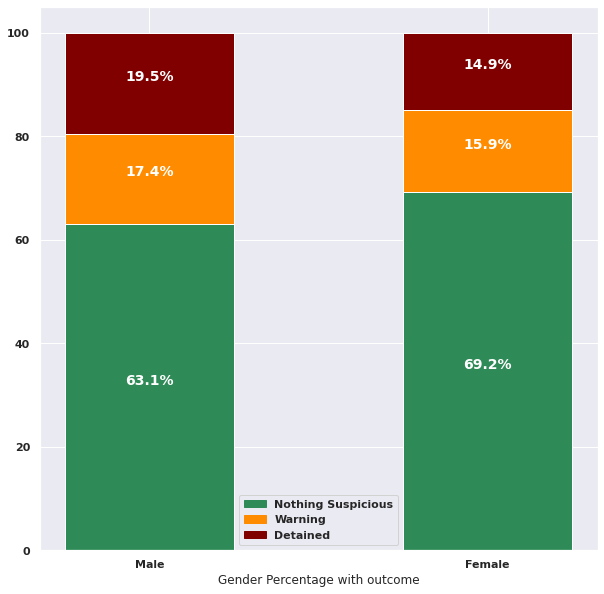

In [ ]:
#************************Outcome with respect to Gender Stacked Bar Plot with Percentages********************************
#Outcome with respect to gender
df_V41.Gender.value_counts().Male #Total Male Count
df_V41.Gender.value_counts().Female #Total Female Count
#Calculating Percentages with Respect to Outcome Type
Male_NS = round((df_NS.Gender.value_counts().Male/df_V41.Gender.value_counts().Male)*100,2)
Female_NS = round((df_NS.Gender.value_counts().Female/df_V41.Gender.value_counts().Female)*100,2)

Male_W = round((df_W.Gender.value_counts().Male/df_V41.Gender.value_counts().Male)*100,2)
Female_W = round((df_W.Gender.value_counts().Female/df_V41.Gender.value_counts().Female)*100,2)

Male_D = round((df_D.Gender.value_counts().Male/df_V41.Gender.value_counts().Male)*100,2)
Female_D = round((df_D.Gender.value_counts().Female/df_V41.Gender.value_counts().Female)*100,2)


# Values of each group
barsNS = [Male_NS, Female_NS]
barsW = [Male_W, Female_W]
barsD = [Male_D, Female_D]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
 
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Male','Female']
barWidth = 0.5
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
# Create brown bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)

# Create green bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create green bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Gender Percentage with outcome")

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
 
# Show graphic
plt.show()


In [ ]:
# #************************Outcome with respect to Gender Stacked Bar Plot with Percentages********************************
# #Outcome with respect to gender
# df_V41.Gender.value_counts().Male #Total Male Count
# df_V41.Gender.value_counts().Female #Total Female Count
# #Calculating Percentages with Respect to Outcome Type
# Male_NS = round((df_NS.Gender.value_counts().Male/df_V41.Gender.value_counts().Male)*100,2)
# Female_NS = round((df_NS.Gender.value_counts().Female/df_V41.Gender.value_counts().Female)*100,2)

# Male_W = round((df_W.Gender.value_counts().Male/df_V41.Gender.value_counts().Male)*100,2)
# Female_W = round((df_W.Gender.value_counts().Female/df_V41.Gender.value_counts().Female)*100,2)

# Male_D = round((df_D.Gender.value_counts().Male/df_V41.Gender.value_counts().Male)*100,2)
# Female_D = round((df_D.Gender.value_counts().Female/df_V41.Gender.value_counts().Female)*100,2)

# # Values of each group
# barsNS = [Male_NS, Female_NS]
# barsW = [Male_W, Female_W]
# barsD = [Male_D, Female_D]
 
# # Heights of bars1 + bars2
# bars = np.add(barsNS, barsW).tolist()
 
# # The position of the bars on the x-axis
# r = [0,1]
 
# # Names of group and bar width
# names = ['Male %','Female %']
# barWidth = 0.5
 
# # Create brown bars
# plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)

# # Create green bars (middle), on top of the first ones
# plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

# colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("Gender Percentage with outcome")

# # Show graphic
# plt.show()


Text(0.5, 1.0, 'Outcome with respect to Age Range')

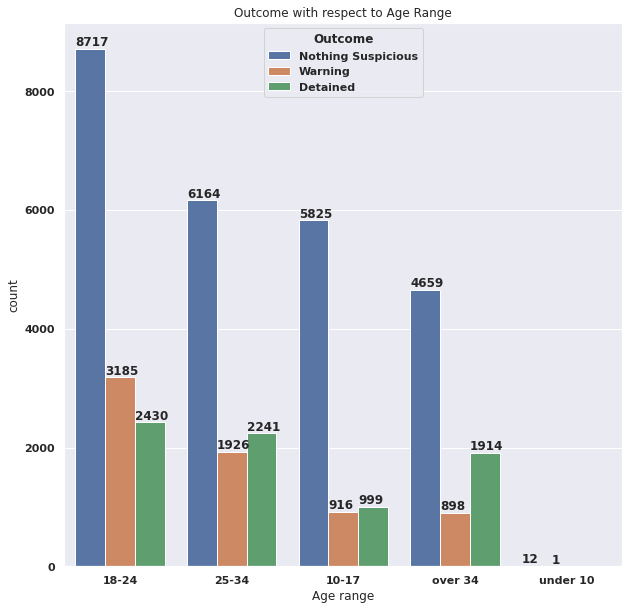

In [ ]:
#Code for generating the Histogram for the Age Range with respect to Crimes
ax = sns.countplot(x='Age range',hue='Outcome',data=df_V41)
sns.set(rc={'figure.figsize':(10,10)})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
plt.title("Outcome with respect to Age Range")

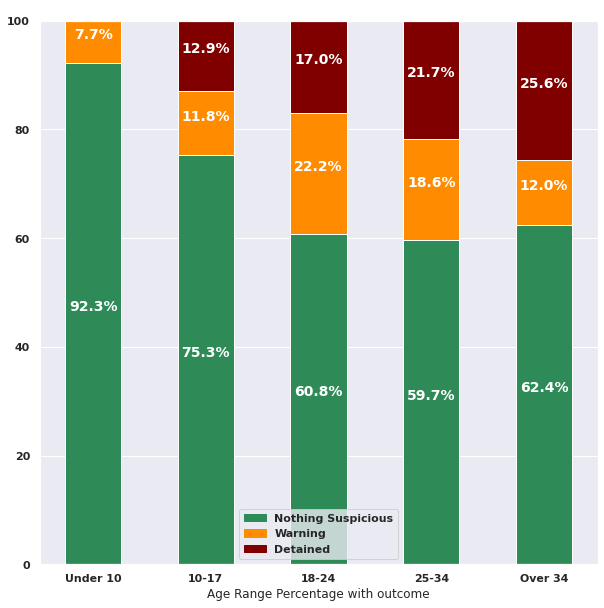

In [ ]:
#************************Outcome with respect to Age Range Stacked Bar Plot with Percentages********************************
#Outcome with respect to Age range

df_V41[(df_V41['Age range']=='18-24')]['Age range'].count() #Total 18-24 Count

#Calculating Percentages with Respect to Outcome Type
AGU10_NS = round((df_NS[(df_NS['Age range']=='under 10')]['Age range'].count()/df_V41[(df_V41['Age range']=='under 10')]['Age range'].count())*100,2)
AG1017_NS = round((df_NS[(df_NS['Age range']=='10-17')]['Age range'].count()/df_V41[(df_V41['Age range']=='10-17')]['Age range'].count())*100,2)
AG1824_NS = round((df_NS[(df_NS['Age range']=='18-24')]['Age range'].count()/df_V41[(df_V41['Age range']=='18-24')]['Age range'].count())*100,2)
AG2534_NS = round((df_NS[(df_NS['Age range']=='25-34')]['Age range'].count()/df_V41[(df_V41['Age range']=='25-34')]['Age range'].count())*100,2)
AGO34_NS = round((df_NS[(df_NS['Age range']=='over 34')]['Age range'].count()/df_V41[(df_V41['Age range']=='over 34')]['Age range'].count())*100,2)

AGU10_W = round((df_W[(df_W['Age range']=='under 10')]['Age range'].count()/df_V41[(df_V41['Age range']=='under 10')]['Age range'].count())*100,2)
AG1017_W = round((df_W[(df_W['Age range']=='10-17')]['Age range'].count()/df_V41[(df_V41['Age range']=='10-17')]['Age range'].count())*100,2)
AG1824_W = round((df_W[(df_W['Age range']=='18-24')]['Age range'].count()/df_V41[(df_V41['Age range']=='18-24')]['Age range'].count())*100,2)
AG2534_W = round((df_W[(df_W['Age range']=='25-34')]['Age range'].count()/df_V41[(df_V41['Age range']=='25-34')]['Age range'].count())*100,2)
AGO34_W = round((df_W[(df_W['Age range']=='over 34')]['Age range'].count()/df_V41[(df_V41['Age range']=='over 34')]['Age range'].count())*100,2)

AGU10_D = round((df_D[(df_D['Age range']=='under 10')]['Age range'].count()/df_V41[(df_V41['Age range']=='under 10')]['Age range'].count())*100,2)
AG1017_D = round((df_D[(df_D['Age range']=='10-17')]['Age range'].count()/df_V41[(df_V41['Age range']=='10-17')]['Age range'].count())*100,2)
AG1824_D = round((df_D[(df_D['Age range']=='18-24')]['Age range'].count()/df_V41[(df_V41['Age range']=='18-24')]['Age range'].count())*100,2)
AG2534_D = round((df_D[(df_D['Age range']=='25-34')]['Age range'].count()/df_V41[(df_V41['Age range']=='25-34')]['Age range'].count())*100,2)
AGO34_D = round((df_D[(df_D['Age range']=='over 34')]['Age range'].count()/df_V41[(df_V41['Age range']=='over 34')]['Age range'].count())*100,2)

# Values of each group
barsNS = [AGU10_NS, AG1017_NS, AG1824_NS, AG2534_NS, AGO34_NS]
barsW = [AGU10_W, AG1017_W, AG1824_W, AG2534_W, AGO34_W]
barsD = [AGU10_D, AG1017_D, AG1824_D, AG2534_D, AGO34_D]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Under 10','10-17', '18-24', '25-34','Over 34']
barWidth = 0.5
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Create brown bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create green bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Age Range Percentage with outcome")

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
 
 
# Show graphic
plt.show()

Text(0.5, 1.0, 'Outcome with respect to Officer-defined ethnicity')

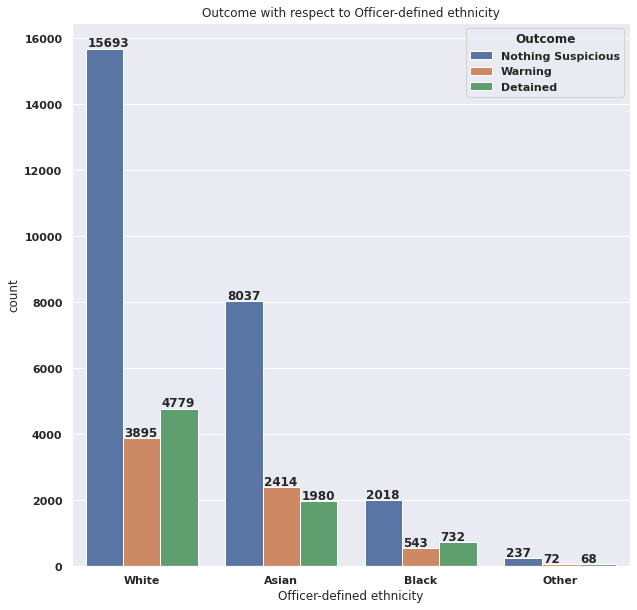

In [ ]:
ax = sns.countplot(x='Officer-defined ethnicity',hue='Outcome',data=df_V41)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Outcome with respect to Officer-defined ethnicity")

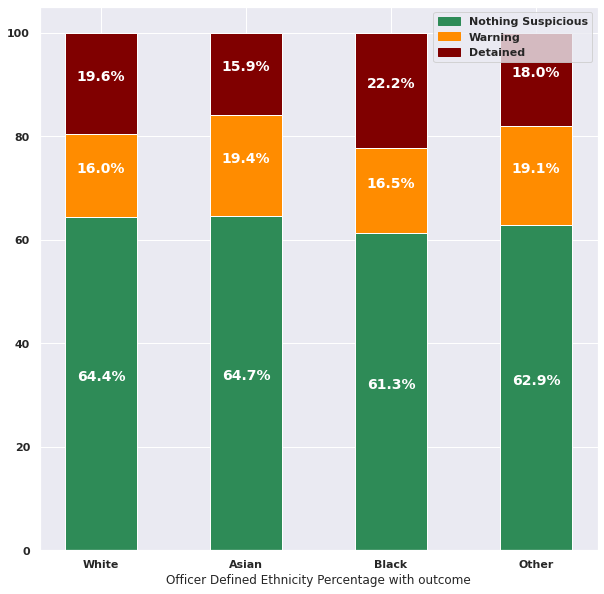

In [ ]:
#************************Outcome with respect to Officer Defined Ethnicity Stacked Bar Plot with Percentages********************************
#Outcome with respect to Officer-defined ethnicity

White = df_V41[(df_V41['Officer-defined ethnicity']=='White')]['Officer-defined ethnicity'].count() #Total white Count
Asian = df_V41[(df_V41['Officer-defined ethnicity']=='Asian')]['Officer-defined ethnicity'].count() #Total Asian Count
Black = df_V41[(df_V41['Officer-defined ethnicity']=='Black')]['Officer-defined ethnicity'].count() #Total Black Count
Other = df_V41[(df_V41['Officer-defined ethnicity']=='Other')]['Officer-defined ethnicity'].count() #Total Other Count

#Calculating Percentages with Respect to Outcome Type
EW_NS = round((df_NS[(df_NS['Officer-defined ethnicity']=='White')]['Officer-defined ethnicity'].count()/White)*100,2)
EA_NS = round((df_NS[(df_NS['Officer-defined ethnicity']=='Asian')]['Officer-defined ethnicity'].count()/Asian)*100,2)
EB_NS = round((df_NS[(df_NS['Officer-defined ethnicity']=='Black')]['Officer-defined ethnicity'].count()/Black)*100,2)
EO_NS = round((df_NS[(df_NS['Officer-defined ethnicity']=='Other')]['Officer-defined ethnicity'].count()/Other)*100,2)


EW_W = round((df_W[(df_W['Officer-defined ethnicity']=='White')]['Officer-defined ethnicity'].count()/White)*100,2)
EA_W = round((df_W[(df_W['Officer-defined ethnicity']=='Asian')]['Officer-defined ethnicity'].count()/Asian)*100,2)
EB_W = round((df_W[(df_W['Officer-defined ethnicity']=='Black')]['Officer-defined ethnicity'].count()/Black)*100,2)
EO_W = round((df_W[(df_W['Officer-defined ethnicity']=='Other')]['Officer-defined ethnicity'].count()/Other)*100,2)


EW_D = round((df_D[(df_D['Officer-defined ethnicity']=='White')]['Officer-defined ethnicity'].count()/White)*100,2)
EA_D = round((df_D[(df_D['Officer-defined ethnicity']=='Asian')]['Officer-defined ethnicity'].count()/Asian)*100,2)
EB_D = round((df_D[(df_D['Officer-defined ethnicity']=='Black')]['Officer-defined ethnicity'].count()/Black)*100,2)
EO_D = round((df_D[(df_D['Officer-defined ethnicity']=='Other')]['Officer-defined ethnicity'].count()/Other)*100,2)

# Values of each group
barsNS = [EW_NS, EA_NS, EB_NS, EO_NS]
barsW = [EW_W, EA_W, EB_W, EO_W]
barsD = [EW_D, EA_D, EB_D, EO_D]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['White','Asian', 'Black', 'Other']
barWidth = 0.5
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
# Create first bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)
# Create 2nd bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create 3rd bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Officer Defined Ethnicity Percentage with outcome")

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
 
# Show graphic
plt.show()

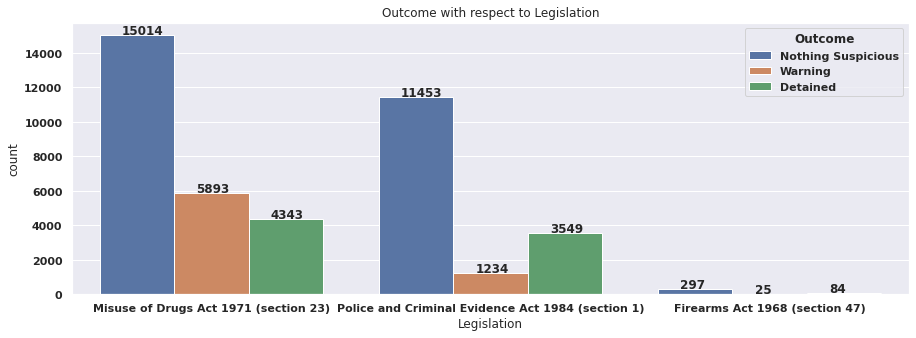

In [ ]:
ax = sns.countplot(x='Legislation',hue='Outcome',data=df_V41)
sns.set(rc={'figure.figsize':(15,5)})
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+50))
plt.title("Outcome with respect to Legislation")
plt.show()
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


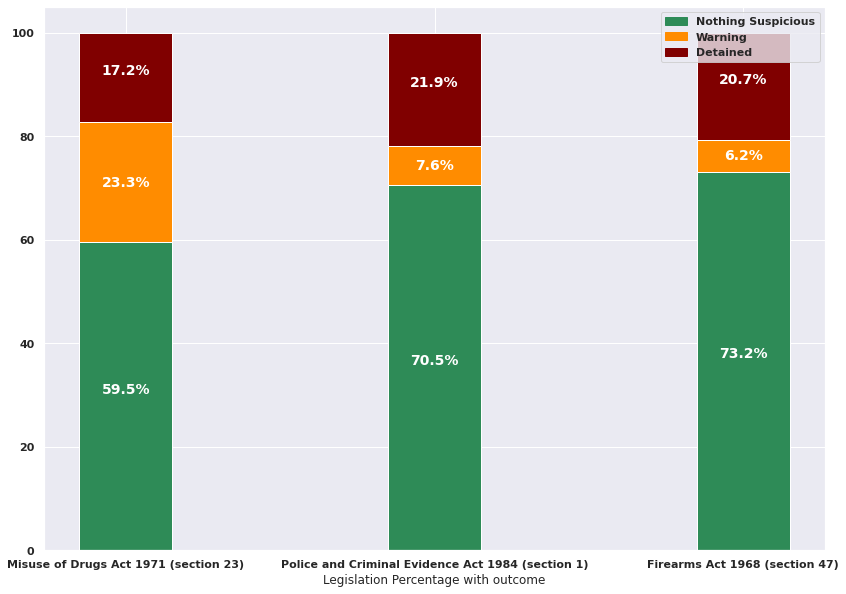

In [ ]:
#************************Outcome with respect to Legislation Stacked Bar Plot with Percentages********************************
#Outcome with respect to Legislation

A1971 = df_V41[(df_V41['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count() #Total Misuse of Drugs Act 1971 (section 23) Count
A1984 = df_V41[(df_V41['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count() #Total Police and Criminal Evidence Act 1984 (section 1) Count
A1986 = df_V41[(df_V41['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count() #Total Firearms Act 1968 (section 47) Count
#df_V41['Legislation'].unique()
#Calculating Percentages with Respect to Outcome Type
A71_NS = round((df_NS[(df_NS['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count()/A1971)*100,2)
A84_NS = round((df_NS[(df_NS['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count()/A1984)*100,2)
A86_NS = round((df_NS[(df_NS['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count()/A1986)*100,2)



A71_W = round((df_W[(df_W['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count()/A1971)*100,2)
A84_W = round((df_W[(df_W['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count()/A1984)*100,2)
A86_W = round((df_W[(df_W['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count()/A1986)*100,2)


A71_D = round((df_D[(df_D['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count()/A1971)*100,2)
A84_D = round((df_D[(df_D['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count()/A1984)*100,2)
A86_D = round((df_D[(df_D['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count()/A1986)*100,2)


# Values of each group
barsNS = [A71_NS, A84_NS, A86_NS]
barsW = [A71_W, A84_W, A86_W]
barsD = [A71_D, A84_D, A86_D]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
# fig = plt.figure()
plt.figure(figsize=(14, 10)) 
# Names of group and bar width
names = ['Misuse of Drugs Act 1971 (section 23)','Police and Criminal Evidence Act 1984 (section 1)', 'Firearms Act 1968 (section 47)']
barWidth = 0.3
ax = fig.add_subplot(1, 1, 1) 
# Create first bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)
# Create 2nd bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create 3rd bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Legislation Percentage with outcome")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")

# Show graphic
plt.show()


Text(0.5, 1.0, 'Outcome with respect to Year')

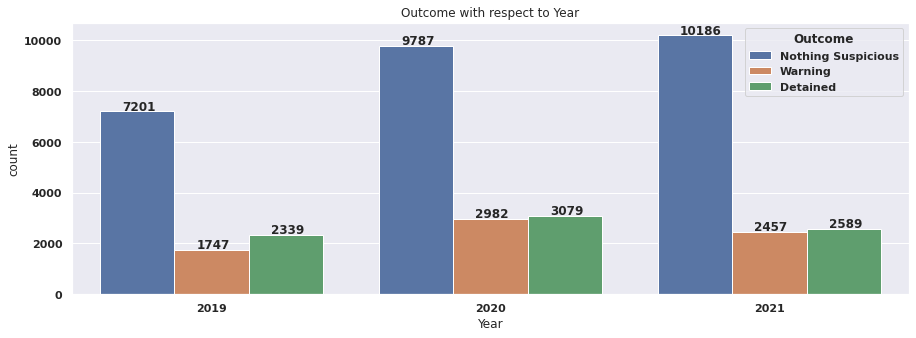

In [ ]:
ax = sns.countplot(x='Year',hue='Outcome',data=df_V41)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+50))
sns.set(rc={'figure.figsize':(5,10)})
plt.title("Outcome with respect to Year")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


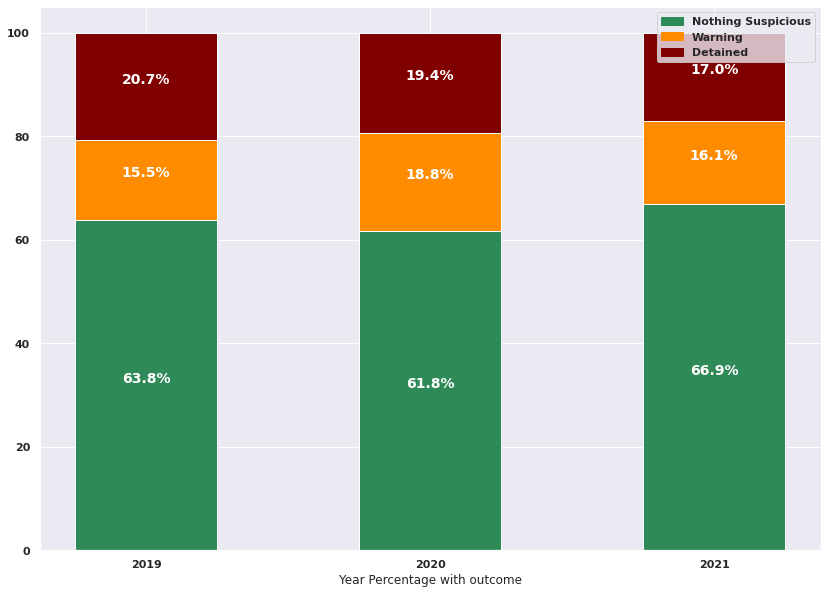

In [ ]:
#************************Outcome with respect to Year Stacked Bar Plot with Percentages********************************
#Outcome with respect to Year

Y2019 = df_V41[(df_V41['Year']==2019)]['Year'].count() #Total 2019 Count
Y2020 = df_V41[(df_V41['Year']==2020)]['Year'].count() #Total 2020 Count
Y2021 = df_V41[(df_V41['Year']==2021)]['Year'].count() #Total 2021 Count

#Calculating Percentages with Respect to Outcome Type
Y19_NS = round((df_NS[(df_NS['Year']==2019)]['Year'].count()/Y2019)*100,2)
Y20_NS = round((df_NS[(df_NS['Year']==2020)]['Year'].count()/Y2020)*100,2)
Y21_NS = round((df_NS[(df_NS['Year']==2021)]['Year'].count()/Y2021)*100,2)


Y19_W = round((df_W[(df_W['Year']==2019)]['Year'].count()/Y2019)*100,2)
Y20_W = round((df_W[(df_W['Year']==2020)]['Year'].count()/Y2020)*100,2)
Y21_W = round((df_W[(df_W['Year']==2021)]['Year'].count()/Y2021)*100,2)


Y19_D = round((df_D[(df_D['Year']==2019)]['Year'].count()/Y2019)*100,2)
Y20_D = round((df_D[(df_D['Year']==2020)]['Year'].count()/Y2020)*100,2)
Y21_D = round((df_D[(df_D['Year']==2021)]['Year'].count()/Y2021)*100,2)

# Values of each group
barsNS= [Y19_NS, Y20_NS, Y21_NS]
barsW = [Y19_W, Y20_W, Y21_W]
barsD = [Y19_D, Y20_D, Y21_D]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
plt.figure(figsize=(14, 10))  
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['2019', '2020', '2021']
barWidth = 0.5
ax = fig.add_subplot(1, 1, 1) 
# Create first bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)
# Create 2nd bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create 3rd bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year Percentage with outcome")

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
 
# Show graphic
plt.show()

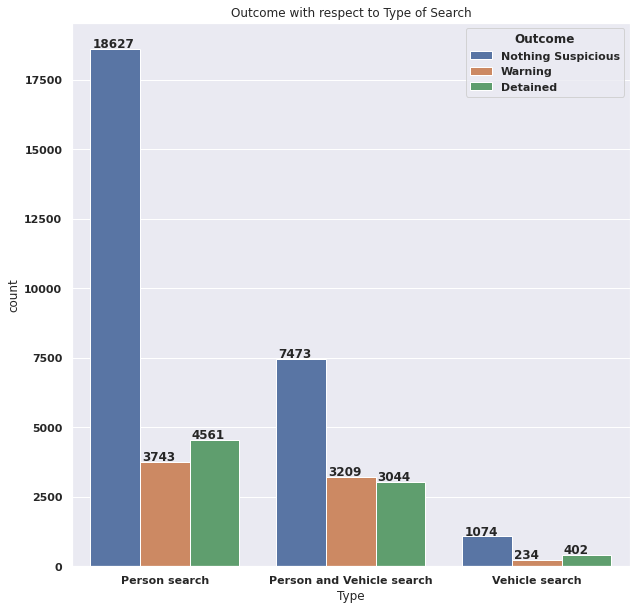

In [ ]:
ax = sns.countplot(x='Type',hue='Outcome',data=df_V41)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Outcome with respect to Type of Search")
plt.show()
print()

In [ ]:
#************************Outcome with respect to Person and vehicle search********************************
#

A1971 = df_V41[(df_V41['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count() #Total Misuse of Drugs Act 1971 (section 23) Count
A1984 = df_V41[(df_V41['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count() #Total Police and Criminal Evidence Act 1984 (section 1) Count
A1986 = df_V41[(df_V41['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count() #Total Firearms Act 1968 (section 47) Count
#df_V41['Legislation'].unique()
#Calculating Percentages with Respect to Outcome Type
A71_NS = round((df_NS[(df_NS['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count()/A1971)*100,2)
A84_NS = round((df_NS[(df_NS['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count()/A1984)*100,2)
A86_NS = round((df_NS[(df_NS['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count()/A1986)*100,2)



A71_W = round((df_W[(df_W['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count()/A1971)*100,2)
A84_W = round((df_W[(df_W['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count()/A1984)*100,2)
A86_W = round((df_W[(df_W['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count()/A1986)*100,2)


A71_D = round((df_D[(df_D['Legislation']=='Misuse of Drugs Act 1971 (section 23)')]['Legislation'].count()/A1971)*100,2)
A84_D = round((df_D[(df_D['Legislation']=='Police and Criminal Evidence Act 1984 (section 1)')]['Legislation'].count()/A1984)*100,2)
A86_D = round((df_D[(df_D['Legislation']=='Firearms Act 1968 (section 47)')]['Legislation'].count()/A1986)*100,2)


# Values of each group
barsNS = [A71_NS, A84_NS, A86_NS]
barsW = [A71_W, A84_W, A86_W]
barsD = [A71_D, A84_D, A86_D]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
# fig = plt.figure()
plt.figure(figsize=(14, 10)) 
# Names of group and bar width
names = ['Misuse of Drugs Act 1971 (section 23)','Police and Criminal Evidence Act 1984 (section 1)', 'Firearms Act 1968 (section 47)']
barWidth = 0.3
ax = fig.add_subplot(1, 1, 1) 
# Create first bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)
# Create 2nd bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create 3rd bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Legislation Percentage with outcome")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")

# Show graphic
plt.show()

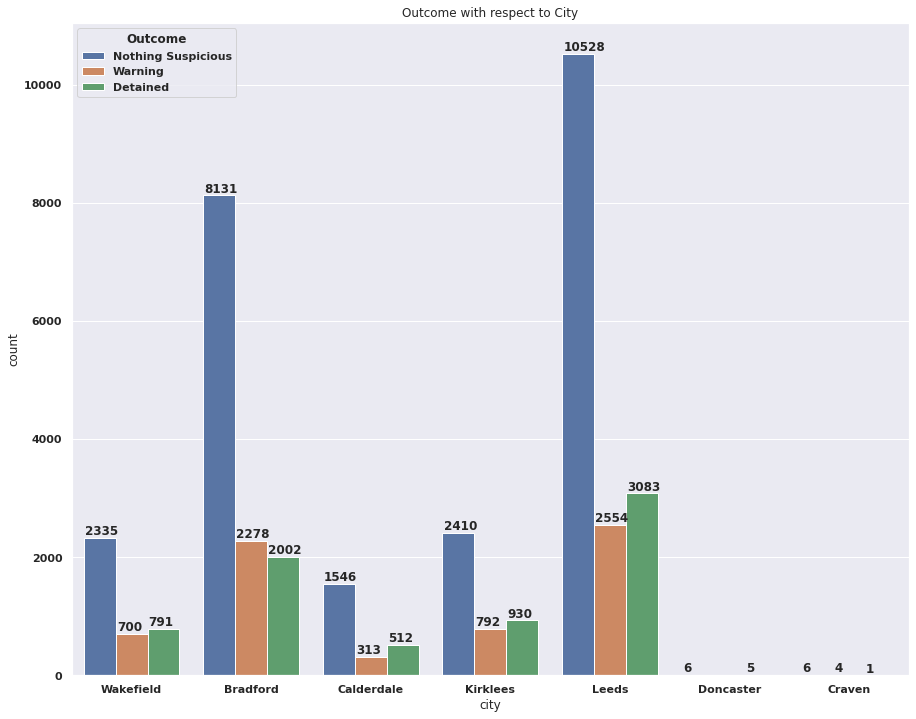

In [ ]:
ax = sns.countplot(x='city',hue='Outcome',data=df_V41)
for p in ax.patches:
        ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+50))
sns.set(rc={'figure.figsize':(15,12)})
plt.title("Outcome with respect to City")
plt.show()
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ValueError: ignored

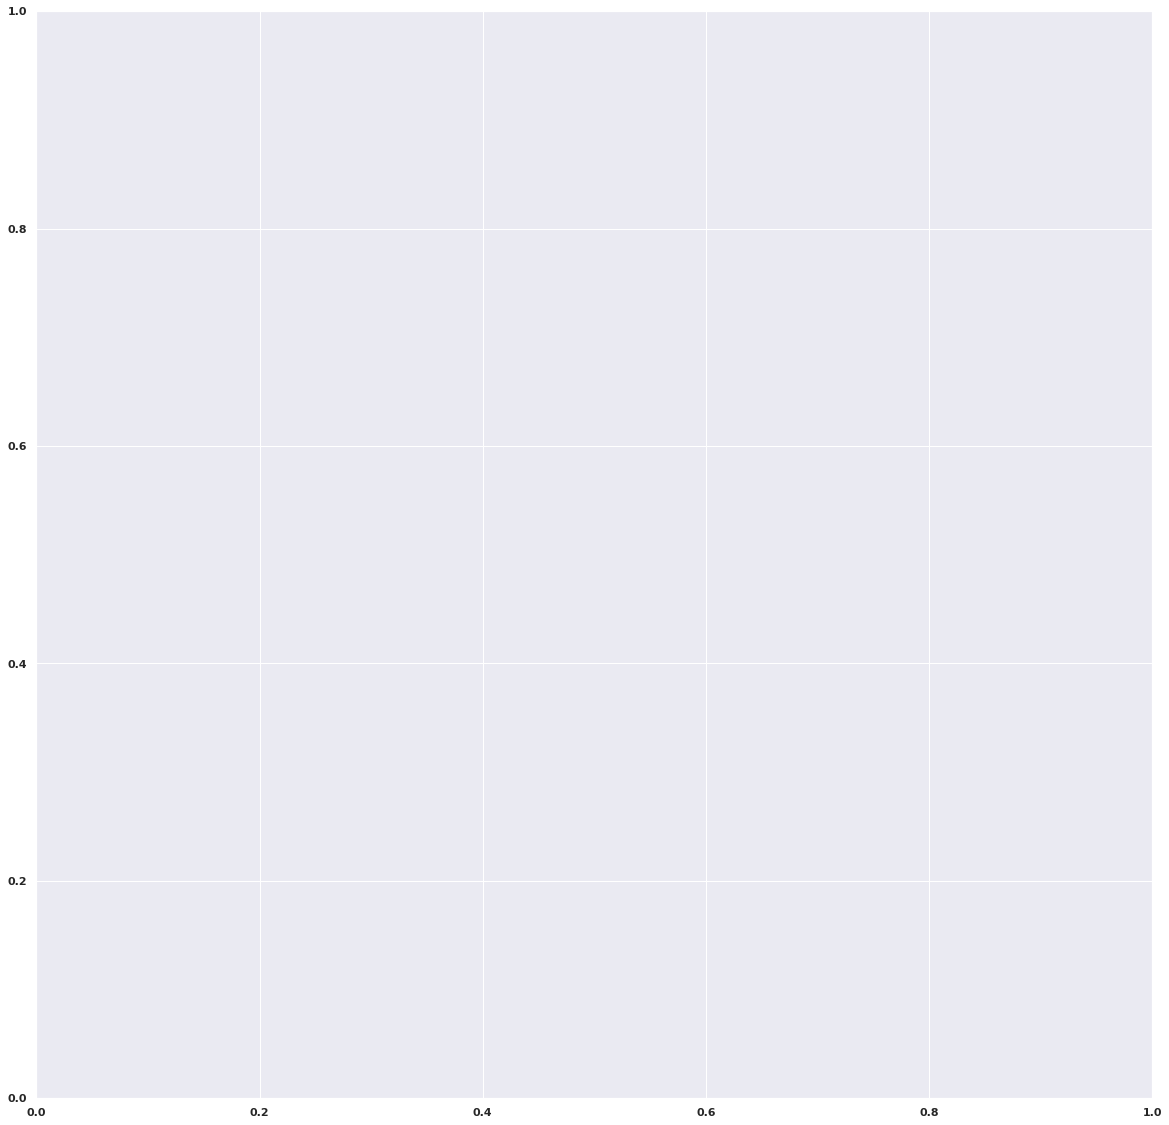

In [ ]:
#************************Outcome with respect to city********************************
#
Awakefield = df_V41[(df_V41['city']=='Wakefield')]['city'].count() #Total wakefield Count
ABradford = df_V41[(df_V41['city']=='Bradford')]['city'].count() #Total Bradford Count
ACalderdale = df_V41[(df_V41['city']=='Calderdale')]['city'].count() #Total Calderdale Count
Akirklees = df_V41[(df_V41['city']=='Kirklees')]['city'].count() #Total Kirklees Count
ALeeds = df_V41[(df_V41['city']=='Leeds')]['city'].count() #Total Leeds Count
Adoncaster = df_V41[(df_V41['city']=='Doncaster')]['city'].count() #Total Doncaster Count
ACraven = df_V41[(df_V41['city']=='Craven')]['city'].count() #Total wakefield Count
#df_V41['city'].unique()
#Calculating Percentages with Respect to Outcome Type
AW_NS = round((df_NS[(df_NS['city']=='Wakefield')]['city'].count()/Awakefield)*100,2)
AB_NS = round((df_NS[(df_NS['city']=='Bradford')]['city'].count()/ABradford)*100,2)
AC_NS = round((df_NS[(df_NS['city']=='Calderdale')]['city'].count()/ACalderdale)*100,2)
AK_NS = round((df_NS[(df_NS['city']=='Kirklees')]['city'].count()/Akirklees)*100,2)
AL_NS = round((df_NS[(df_NS['city']=='Leeds')]['city'].count()/ALeeds)*100,2)
AD_NS = round((df_NS[(df_NS['city']=='Doncaster')]['city'].count()/Adoncaster)*100,2)
ACA_NS = round((df_NS[(df_NS['city']=='Craven')]['city'].count()/ACraven)*100,2)



AW_W = round((df_W[(df_W['city']=='Wakefield')]['city'].count()/Awakefield)*100,2)
AB_W = round((df_W[(df_W['city']=='Bradford')]['city'].count()/ABradford)*100,2)
AC_W = round((df_W[(df_W['city']=='Calderdale')]['city'].count()/ACalderdale)*100,2)
AK_W = round((df_W[(df_W['city']=='Kirklees')]['city'].count()/Akirklees)*100,2)
AL_W = round((df_W[(df_W['city']=='Leeds')]['city'].count()/ALeeds)*100,2)
AD_W = round((df_W[(df_W['city']=='Doncaster')]['city'].count()/Adoncaster)*100,2)
ACA_W = round((df_W[(df_W['city']=='Craven')]['city'].count()/ACraven)*100,2)


AW_D = round((df_D[(df_D['city']=='Wakefield')]['city'].count()/Awakefield)*100,2)
AB_D = round((df_D[(df_D['city']=='Bradford')]['city'].count()/ABradford)*100,2)
AC_D = round((df_D[(df_D['city']=='Calderdale')]['city'].count()/ACalderdale)*100,2)
AK_D = round((df_D[(df_D['city']=='Kirklees')]['city'].count()/Akirklees)*100,2)
AL_D = round((df_D[(df_D['city']=='Leeds')]['city'].count()/ALeeds)*100,2)
AD_D = round((df_D[(df_D['city']=='Doncaster')]['city'].count()/Adoncaster)*100,2)
ACA_D = round((df_D[(df_D['city']=='Craven')]['city'].count()/ACraven)*100,2)


# Values of each group
barsNS = [AW_NS, AB_NS, AC_NS , AK_NS , AL_NS ,AD_NS ,ACA_NS ]
barsW = [AW_W, AB_W, AC_W , AK_W , AL_W ,AD_W ,ACA_W ]
barsD = [AW_D, AB_D, AC_D , AK_D , AL_D ,AD_D ,ACA_D ]
 
# Heights of bars1 + bars2
bars = np.add(barsNS, barsW).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
# fig = plt.figure()
plt.figure(figsize=(20, 20)) 
# Names of group and bar width
names = ['Wakefield', 'Bradford', 'Calderdale', 'Kirklees', 'Leeds','Doncaster', 'Craven']
barWidth = 0.3
ax = fig.add_subplot(1, 1, 1) 
# Create first bars
ax1 = plt.bar(r, barsNS, color='seagreen', edgecolor='white', width=barWidth)
# Create 2nd bars (middle), on top of the first ones
ax2 = plt.bar(r, barsW, bottom=barsNS, color='darkorange', edgecolor='white', width=barWidth)
# Create 3rd bars (top)
ax3 = plt.bar(r, barsD, bottom=bars, color='maroon', edgecolor='white', width=barWidth)

colors = {'Nothing Suspicious':'seagreen', 'Warning':'darkorange', 'Detained':'maroon'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("City wise Percentage with outcome")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%0.1f" % h1 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%0.1f" % h2 + "%", ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%0.1f" % h3 + "%", ha="center", va="bottom", color="white", fontsize=14, fontweight="bold")

# Show graphic
plt.show()

In [ ]:
#Save Data Version 5 for Data Analysis Columns
# Type,Date,Part of a policing operation,Gender,
# Age range,Self-defined ethnicity, Officer-defined ethnicity
# ,Legislation,Object of search,Outcome,
# Removal of more than just outer clothing,city
#Here we've removed the variable year because we are using the orignal values provided
df_DataAnalysis = df_V41[['Type',
'Date',
'Part of a policing operation',
'Gender',
'Age range',
'Self-defined ethnicity',
'Officer-defined ethnicity',
'Legislation',
'Object of search',
'Outcome',
'Removal of more than just outer clothing',
'city']]
df_DataAnalysis.info()

Data Analysis Starts here After Doing Cleaning and Transformation Operation With 42,367 Rows
We are using only these columns for the Statistical Analysis: 


'Type',
'Date',
'Part of a policing operation',
'Gender',
'Age range',
'Self-defined ethnicity',
'Officer-defined ethnicity',
'Legislation',
'Object of search',
'Outcome',
'Removal of more than just outer clothing',
'city'

In [ ]:
#Do Not Run This code as this will create the file again
#This Data is stored after cleaning 
# df_DataAnalysis.to_csv('/content/drive/MyDrive/Dataset/DataAnalysis.csv')#Donot RUN this Line As it is already been done once to Save file

In [ ]:
DataAnalysis = pd.read_csv(path+'DataAnalysis.csv',index_col=[0])

In [ ]:
DataAnalysis.head()

,Type,Date,Part of a policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing,city
0,Person search,01/01/2019 00:05,False,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,False,Wakefield
1,Person search,01/01/2019 00:25,False,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,False,Wakefield
2,Person search,01/01/2019 00:25,False,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Warning,False,NaN
3,Person search,01/01/2019 00:50,False,Male,25-34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing Suspicious,False,Bradford
4,Person search,01/01/2019 02:00,False,Male,10-17,Mixed/Multiple ethnic groups - White and Black...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Nothing Suspicious,False,Calderdale


We will Apply The Statistical Tests From Here Onwards

Chi Square Test will be used for the Categorical Variable Analysis as we have all the variables in Categorical Form

What is a Chi-square Test?

The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset. That is, it defines the correlation amongst the grouping categorical data.

Using the Chi-square test, we can estimate the level of correlation i.e. association between the categorical variables of the dataset. This helps us analyze the dependence of one category of the variable on the other independent category of the variable.
https://medium.com/@kuldeepnpatel/chi-square-test-of-independence-bafd14028250

In [ ]:
#Calculating Chi Sq Using Two For Loops so It will iterate between Each Column and with every other colum
import pandas as pd
from scipy import stats
from scipy.stats import chi2
# DataAnalysisTemp = DataAnalysis #RUN this line only once
#Below is the function to calculate Chi Square, P-Value, Degree of Freedom, Critical Value
def DataAnalysisChiSq(ColName1,ColName2):
    crosstab = pd.crosstab(DataAnalysis[ColName1], DataAnalysis[ColName2])
    nl = "\n"
    chisq, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"\n\nChi Square Test Between: {ColName1} & {ColName2}")
    #critical_value
    alpha = 0.05 #Significance Level 
    critical_value=chi2.ppf(q=1-0.05,df=dof)
    print(f"Chi2 value= {chisq}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}Critical value = {critical_value}")
    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    print("Chi Square Analysis between Chi Square Value & Critical Value")
    if chisq >= critical_value:
      print(f"Reject H0,There is a relationship between: {ColName1} & {ColName2}")
    else:
      print(f"Retain H0,There is no relationship between: {ColName1} & {ColName2}") 
    print(f"Analysis between P-Value & Significance Level")
    if p<=alpha:
      print(f"Reject H0,There is a relationship between: {ColName1} & {ColName2} ")
    else:
      print(f"Retain H0,There is no relationship between: {ColName1} & {ColName2} ")


This code below is just calling the function Above to calculate Chi Sq and the only condition here is that it will not calculate Chi Sq between the same columns, because it was giving me errors therefore I had to remove them.

In [ ]:
#Code for checking Chi Square for each column to each other column
for key,values in DataAnalysis.iteritems():
  for keyT,valuesT in DataAnalysis.iteritems():
    if key!=keyT:
      DataAnalysisChiSq(key,keyT)#Function Calling



Chi Square Test Between: Type & Date
Chi2 value= 71766.78531916642
p-value= 1.053229636943887e-54
Degrees of freedom= 65964
Critical value = 66562.57686077726
Chi Square Analysis between Chi Square Value & Critical Value
Reject H0,There is a relationship between: Type & Date
Analysis between P-Value & Significance Level
Reject H0,There is a relationship between: Type & Date 


Chi Square Test Between: Type & Part of a policing operation
Chi2 value= 31.407066217026095
p-value= 1.5137084126516384e-07
Degrees of freedom= 2
Critical value = 5.991464547107979
Chi Square Analysis between Chi Square Value & Critical Value
Reject H0,There is a relationship between: Type & Part of a policing operation
Analysis between P-Value & Significance Level
Reject H0,There is a relationship between: Type & Part of a policing operation 


Chi Square Test Between: Type & Gender
Chi2 value= 142.71798619642237
p-value= 1.0213699195723422e-31
Degrees of freedom= 2
Critical value = 5.991464547107979
Chi Squar

The Code Beyond this point is not verified yet It is under consideration

In [ ]:
#Converting All the Categorical Variables to Label Encoding for Statistical Analysis
df_Encode = df_v3
# Get Label of columns Outcome
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column Outcome. 
df_Encode['Outcome']= label_encoder.fit_transform(df_Encode['Outcome']) 
df_Encode.head()

In [ ]:
# Encode labels in column 'Legislation'. 
df_Encode['Legislation']= label_encoder.fit_transform(df_Encode['Legislation']) 
df_Encode.head()

In [ ]:
# Get one Label encoding of columns Age range
df_Encode['Age range']= label_encoder.fit_transform(df_Encode['Age range']) 
df_Encode.head()

In [ ]:
# Get Label encoding of columns Gender
df_Encode['Gender']= label_encoder.fit_transform(df_Encode['Gender']) 
df_Encode.head()

In [ ]:
# Get Label encoding of columns Object of search
df_Encode['Object of search']= label_encoder.fit_transform(df_Encode['Object of search']) 
df_Encode.head()

In [ ]:
# Get one Label encoding of columns Officer-defined ethnicity
df_Encode['Officer-defined ethnicity']= label_encoder.fit_transform(df_Encode['Officer-defined ethnicity']) 
df_Encode.head()

In [ ]:
#Gender
#T Test P Value and 
# Import the stats function from the scipy package as ‘st’
import scipy.stats as st
#Running the T Test for Varibale to get the report what is dependent on Outcome
t, p = st.ttest_ind(df_Encode['Outcome'], df_Encode['Gender'],
equal_var = False)
#Calculating Effect Size
import math
r = math.sqrt(t**2/(t**2 + (df_Encode['Outcome'].count() + df_Encode['Gender'].count() - 2)))
#Printing the Results
print("t =", round(t, 8))
print("p =", round(p, 8))
print("r =", round(r, 8))

In [ ]:
#Legislation
#T Test P Value and 
# Import the stats function from the scipy package as ‘st’
import scipy.stats as st
#Running the T Test for Varibale to get the report what is dependent on Outcome
t, p = st.ttest_ind(df_Encode['Outcome'], df_Encode['Legislation'],
equal_var = False)
#Calculating Effect Size
import math
r = math.sqrt(t**2/(t**2 + (df_Encode['Outcome'].count() + df_Encode['Legislation'].count() - 2)))
#Printing the Results
print("t =", round(t, 8))
print("p =", round(p, 8))
print("r =", round(r, 8))

In [ ]:
#Age range
#T Test P Value and 
# Import the stats function from the scipy package as ‘st’
import scipy.stats as st
#Running the T Test for Varibale to get the report what is dependent on Outcome
t, p = st.ttest_ind(df_Encode['Outcome'], df_Encode['Age range'],
equal_var = False)
#Calculating Effect Size
import math
r = math.sqrt(t**2/(t**2 + (df_Encode['Outcome'].count() + df_Encode['Age range'].count() - 2)))
#Printing the Results
print("t =", round(t, 8))
print("p =", round(p, 8))
print("r =", round(r, 8))

In [ ]:
#Officer-defined ethnicity
#T Test P Value and 
# Import the stats function from the scipy package as ‘st’
import scipy.stats as st
#Running the T Test for Varibale to get the report what is dependent on Outcome
t, p = st.ttest_ind(df_Encode['Outcome'], df_Encode['Officer-defined ethnicity'],
equal_var = False)
#Calculating Effect Size
import math
r = math.sqrt(t**2/(t**2 + (df_Encode['Outcome'].count() + df_Encode['Officer-defined ethnicity'].count() - 2)))
#Printing the Results
print("t =", round(t, 8))
print("p =", round(p, 8))
print("r =", round(r, 8))

In [ ]:
#Object of search
#T Test P Value and 
# Import the stats function from the scipy package as ‘st’
import scipy.stats as st
#Running the T Test for Varibale to get the report what is dependent on Outcome
t, p = st.ttest_ind(df_Encode['Outcome'], df_Encode['Object of search'],
equal_var = False)
#Calculating Effect Size
import math
r = math.sqrt(t**2/(t**2 + (df_Encode['Outcome'].count() + df_Encode['Object of search'].count() - 2)))
#Printing the Results
print("t =", round(t, 8))
print("p =", round(p, 8))
print("r =", round(r, 8))